### BASELINE MODELING (DECISION TREES)

#### Importing data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import os

In [3]:
# Importing dataset
data_draw = pd.read_csv('../data/processed/Draw_Ticket.csv')
data_scratch = pd.read_csv('../data/processed/Scratch_Ticket.csv')

In [4]:
# Checking imported data    
data_draw.sample(5)

,Unnamed: 0,Amount Won,US Citizen Flag,Claimant City,Claimant State,Claimant County,Scratch Ticket or Draw Game,Date Ticket Sold,Retailer Name,Retailer City,Retailer County
236375,340612,2600.0,Yes,Houston,TX,Harris,Daily 4™,01/03/2023,STAR STOP 47,Houston,Harris
1084295,2613556,350.0,Yes,Fort Worth,TX,Tarrant,Cash Five®,02/09/2024,7-ELEVEN CONVENIENCE STORE # 26580B,Fort Worth,Tarrant
496158,640760,1695.0,Yes,Buna,TX,Jasper,Lotto Texas®,01/26/2017,STRIPES 2280,Carrizo Springs,Dimmit
1156954,2787977,1.0,Yes,Houston,TX,Harris,Cash Five®,12/02/2024,LIQUOR BARGAIN,Houston,Harris
850329,998229,5000.0,Yes,Grand Prairie,TX,Bastrop,Mega Millions®,09/14/2013,1 STOP FOOD STORE,Irving,Dallas


In [5]:
data_scratch.sample(5)

,Unnamed: 0,Amount Won,US Citizen Flag,Claimant City,Claimant State,Claimant County,Scratch Ticket Cost,Retailer Name,Retailer City,Retailer County
1256035,2267295,3.0,Yes,El Paso,TX,Nueces,3.0,Unknown,Corpus Christi,Denton
810578,1821163,4.0,Yes,San Antonio,TX,Bexar,2.0,Unknown,Lufkin,Brazoria
150174,1117197,1000.0,Yes,Beaumont,TX,Jefferson,30.0,NEIGHBORHOOD FOOD MART AND GAS STATION,Beaumont,Jefferson
1182534,2193789,5.0,Yes,Corpus Christi,TX,Nueces,5.0,Unknown,El Paso,Tarrant
1252020,2263280,700.0,Yes,Dallas,TX,Lubbock,7.0,Unknown,Goliad,Mclennan


In [6]:
# Dropping unnecessary columns
data_draw = data_draw.drop(columns=['Unnamed: 0'])
data_scratch = data_scratch.drop(columns=['Unnamed: 0'])

#### Training/Testing


In [7]:
# Using prize amount as defining feature
X_s = data_scratch.drop(columns=['Amount Won'])
y_s = data_scratch['Amount Won']
X_d = data_draw.drop(columns=['Amount Won'])
y_d = data_draw['Amount Won']

In [8]:
X_s.dtypes

US Citizen Flag         object
Claimant City           object
Claimant State          object
Claimant County         object
Scratch Ticket Cost    float64
Retailer Name           object
Retailer City           object
Retailer County         object
dtype: object

In [9]:
# Data needs to be categorical for Decision Tree Classifier
X_s = X_s.astype('category')
X_d = X_d.astype('category')

In [10]:
X_s.dtypes

US Citizen Flag        category
Claimant City          category
Claimant State         category
Claimant County        category
Scratch Ticket Cost    category
Retailer Name          category
Retailer City          category
Retailer County        category
dtype: object

In [11]:
# Training in a 70-30 test split
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.3, random_state=1)
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.3, random_state=1)

In [12]:
# Training decision tree model
model_s = DecisionTreeRegressor(random_state=1)
model_d = DecisionTreeRegressor(random_state=1)

In [13]:
# Fit training data to model
model_s.fit(X_s_train, y_s_train)
model_d.fit(X_d_train, y_d_train)

ValueError: could not convert string to float: 'Yes'

#### Encoding


Even when using categorical data, it seems that the decision tree still tries to convert the string into float so we will have to encode the data

In [14]:
import category_encoders as ce
import json

In [15]:
# Initialize the target encoder
encoder_s = ce.TargetEncoder(cols=['US Citizen Flag', 'Claimant City', 'Claimant State', 'Claimant County',
'Scratch Ticket Cost', 'Retailer Name', 'Retailer City', 'Retailer County'])
encoder_d = ce.TargetEncoder(cols=['US Citizen Flag', 'Claimant City', 'Claimant State', 'Claimant County', 
'Scratch Ticket or Draw Game', 'Date Ticket Sold', 'Retailer Name', 'Retailer City', 'Retailer County'])


In [16]:
# Apply the encoder
X_se = encoder_s.fit_transform(X_s[['US Citizen Flag', 'Claimant City', 'Claimant State', 'Claimant County',
'Scratch Ticket Cost', 'Retailer Name', 'Retailer City', 'Retailer County']], y_s)
X_de = encoder_d.fit_transform(X_d[['US Citizen Flag', 'Claimant City', 'Claimant State', 'Claimant County',
'Scratch Ticket or Draw Game', 'Date Ticket Sold', 'Retailer Name', 'Retailer City', 'Retailer County']], y_d)

In [17]:
X_s.head()

,US Citizen Flag,Claimant City,Claimant State,Claimant County,Scratch Ticket Cost,Retailer Name,Retailer City,Retailer County
0,Yes,Grand Rapids,MI,Kent,10.0,TRISTAR #10,San Marcos,Hays
1,Not Provided,San Antonio,TX,Bexar,20.0,7 DAY CORNER STORE,San Antonio,Bexar
2,Not Provided,San Antonio,TX,Bexar,20.0,FUEL STATION 4,Castle Hills,Bexar
3,Yes,Los Angeles,CA,Los Angeles,3.0,PETRO STOPPING CENTERS #302,Weatherford,Parker
4,Not Provided,Fort Deposit,AL,Lowndes,1.0,24 EXPRESS,Houston,Harris


We are going to use frequency encoding because of the size of the data and ease to decode

In [18]:
# Not using scratch ticket price since it is a float
cat_columns_s = ['US Citizen Flag', 'Claimant City', 'Claimant State', 'Claimant County', 'Retailer Name', 'Retailer City', 'Retailer County']
cat_columns_d = ['US Citizen Flag', 'Claimant City', 'Claimant State', 'Claimant County', 'Scratch Ticket or Draw Game', 'Date Ticket Sold', 'Retailer Name', 'Retailer City', 'Retailer County']

# --- Frequency Encoding for X_s ---
X_se = X_s.copy()
reverse_frequency_mapping_s = {}
try:
    for column in cat_columns_s:
        # Calculate frequency encoding (counts, not proportions, as in your code)
        frequency_encoding_s = X_s[column].value_counts().to_dict()
        # Replace original column with encoded values
        X_se[column] = X_s[column].map(frequency_encoding_s).astype(np.int32)
        # Store reverse mapping (frequency -> category)
        reverse_frequency_mapping_s[column] = {str(v): str(k) for k, v in frequency_encoding_s.items()}
except Exception as e:
    print(f"Error during frequency encoding (X_s): {e}")
    raise

# Save reverse mappings for X_s
try:
    file_path_sm = os.path.join('../data/processed', 'freq_mappings_X_s.json')
    with open(file_path_sm, 'w') as f:
        json.dump(reverse_frequency_mapping_s, f)
except Exception as e:
    print(f"Error saving mappings (X_s): {e}")
    raise

# Save csv to processed folder
file_path_s = os.path.join('../data/processed', 'Scratch_Ticket_Encoded.csv')
X_se.to_csv(file_path_s)

# --- Frequency Encoding for X_d ---
X_de = X_d.copy()
reverse_frequency_mapping_d = {}
try:
    for column in cat_columns_d:
        # Calculate frequency encoding (counts)
        frequency_encoding_d = X_d[column].value_counts().to_dict()
        # Replace original column with encoded values
        X_de[column] = X_d[column].map(frequency_encoding_d).astype(np.int32)
        # Store reverse mapping
        reverse_frequency_mapping_d[column] = {str(v): str(k) for k, v in frequency_encoding_d.items()}
except Exception as e:
    print(f"Error during frequency encoding (X_d): {e}")
    raise

# Save reverse mappings for X_d
try:
    file_path_dm = os.path.join('../data/processed', 'freq_mappings_X_d.json')
    with open(file_path_dm, 'w') as f:
        json.dump(reverse_frequency_mapping_d, f)
except Exception as e:
    print(f"Error saving mappings (X_d): {e}")
    raise

file_path_d = os.path.join('../data/processed', 'Draw_Ticket_Encoded.csv')
X_de.to_csv(file_path_d)

In [19]:
# Checking the encoded data
X_se.head()

,US Citizen Flag,Claimant City,Claimant State,Claimant County,Scratch Ticket Cost,Retailer Name,Retailer City,Retailer County
0,1415950,131,3143,365,10.0,41,3793,12022
1,240211,98698,1424945,118450,20.0,11,121631,138018
2,240211,98698,1424945,118450,20.0,67,590,138018
3,1415950,976,12992,3058,3.0,96,4381,6922
4,240211,7,10390,238,1.0,29,144373,207955


In [20]:
X_de.head()

,US Citizen Flag,Claimant City,Claimant State,Claimant County,Scratch Ticket or Draw Game,Date Ticket Sold,Retailer Name,Retailer City,Retailer County
0,1088886,762,1071630,2778,185619,3707,242363,92565,226033
1,1088886,762,1071630,2778,185619,121,242363,63033,226033
2,1088886,762,1071630,2778,185619,95,242363,4490,965
3,1088886,762,1071630,2778,185619,235,242363,945,226033
4,1088886,26247,1071630,121994,185619,292,242363,1282,47313


#### Retraining and testing data

In [21]:
# Training in a 70-30 test split
X_se_train, X_se_test, y_s_train, y_s_test = train_test_split(X_se, y_s, test_size=0.3, random_state=1)
X_de_train, X_de_test, y_d_train, y_d_test = train_test_split(X_de, y_d, test_size=0.3, random_state=1)

In [22]:
# Training decision tree model (changing random state just in case)
model_se = DecisionTreeRegressor(random_state=42)
model_de = DecisionTreeRegressor(random_state=42)

In [23]:
# Fit training data to model
model_se.fit(X_se_train, y_s_train)
model_de.fit(X_de_train, y_d_train)

DecisionTreeRegressor(random_state=42)

In [24]:
# Make predictions on the test set
y_s_pred = model_se.predict(X_se_test)
y_d_pred = model_de.predict(X_de_test)

In [25]:
X_se_test

,US Citizen Flag,Claimant City,Claimant State,Claimant County,Scratch Ticket Cost,Retailer Name,Retailer City,Retailer County
402840,1415950,9749,1424945,102966,20.0,52,20666,99119
1322860,1415950,8412,1424945,17458,5.0,786027,252,18272
63392,1415950,46,1424945,390,10.0,786027,2327,71053
202630,1415950,309,1424945,918,1.0,53,890,1519
46706,1415950,2810,6362,4116,2.0,786027,16378,29168
...,...,...,...,...,...,...,...,...
1190700,1415950,13884,1424945,1269,30.0,786027,787,6262
308513,1415950,5118,1424945,16804,50.0,72,6287,20049
547250,1415950,1781,1424945,24674,5.0,87,7159,22889
1569968,1415950,117894,1424945,176459,5.0,112,722,4661


Filtering the data into 100 of the most frequent categories (like most used retail name) to make it easier to graph and understand

In [26]:
# Create an empty DataFrame to store filtered data
filtered_X_s = X_se_test.copy()
filtered_y_s_pred = y_s_pred.copy()

# Loop through each categorical column and filter the top 100 categories
for column in cat_columns_s:
    # Get the top 100 most frequent categories for the column
    top_100_categories = X_se_test[column].value_counts().nlargest(100).index
    
    # Filter the dataset based on these top 100 categories
    filtered_y_s_pred = filtered_y_s_pred[filtered_X_s[column].isin(top_100_categories)]
    filtered_X_s = filtered_X_s[filtered_X_s[column].isin(top_100_categories)]

# Create an empty DataFrame to store filtered data
filtered_X_d = X_de_test.copy()
filtered_y_d_pred = y_d_pred.copy()

# Loop through each categorical column and filter the top 100 categories
for column in cat_columns_d:
    # Get the top 100 most frequent categories for the column
    top_100_categories = X_de_test[column].value_counts().nlargest(100).index
    
    # Filter the dataset based on these top 100 categories
    filtered_y_d_pred = filtered_y_d_pred[filtered_X_d[column].isin(top_100_categories)]
    filtered_X_d = filtered_X_d[filtered_X_d[column].isin(top_100_categories)]

### FIGURES

#### Decoding

In [27]:
# --- Decoding Example ---
# Load mappings for X_s
try:
    with open('../data/processed/freq_mappings_X_s.json', 'r') as f:
        reverse_frequency_mapping_s = json.load(f)
except Exception as e:
    print(f"Error loading mappings (X_s): {e}")
    raise

X_sd = filtered_X_s.copy()
for column in cat_columns_s:
    if column not in reverse_frequency_mapping_s:
        print(f"Warning: Mapping for {column} not found in X_s, skipping")
        continue
    # Convert string counts to int
    reverse_mapping = {int(k): v for k, v in reverse_frequency_mapping_s[column].items()}
    def decode_freq(value, mapping, tolerance=1e-6):
        for freq, cat in mapping.items():
            if abs(value - freq) < tolerance:
                return cat
        return 'Unknown'
    try:
        X_sd[column] = X_se_test[column].apply(lambda x: decode_freq(x, reverse_mapping))
    except Exception as e:
        print(f"Error decoding {column} (X_s): {e}")
        continue

# --- Decoding Example (Optional) ---
# Load mappings for X_s
try:
    with open('../data/processed/freq_mappings_X_d.json', 'r') as f:
        reverse_frequency_mapping_s = json.load(f)
except Exception as e:
    print(f"Error loading mappings (X_d): {e}")
    raise

X_dd = filtered_X_d.copy()
for column in cat_columns_d:
    if column not in reverse_frequency_mapping_d:
        print(f"Warning: Mapping for {column} not found in X_d, skipping")
        continue
    # Convert string counts to int
    reverse_mapping = {int(k): v for k, v in reverse_frequency_mapping_d[column].items()}
    def decode_freq(value, mapping, tolerance=1e-6):
        for freq, cat in mapping.items():
            if abs(value - freq) < tolerance:
                return cat
        return 'Unknown'
    try:
        X_dd[column] = X_de_test[column].apply(lambda x: decode_freq(x, reverse_mapping))
    except Exception as e:
        print(f"Error decoding {column} (X_d): {e}")
        continue

#### Figures

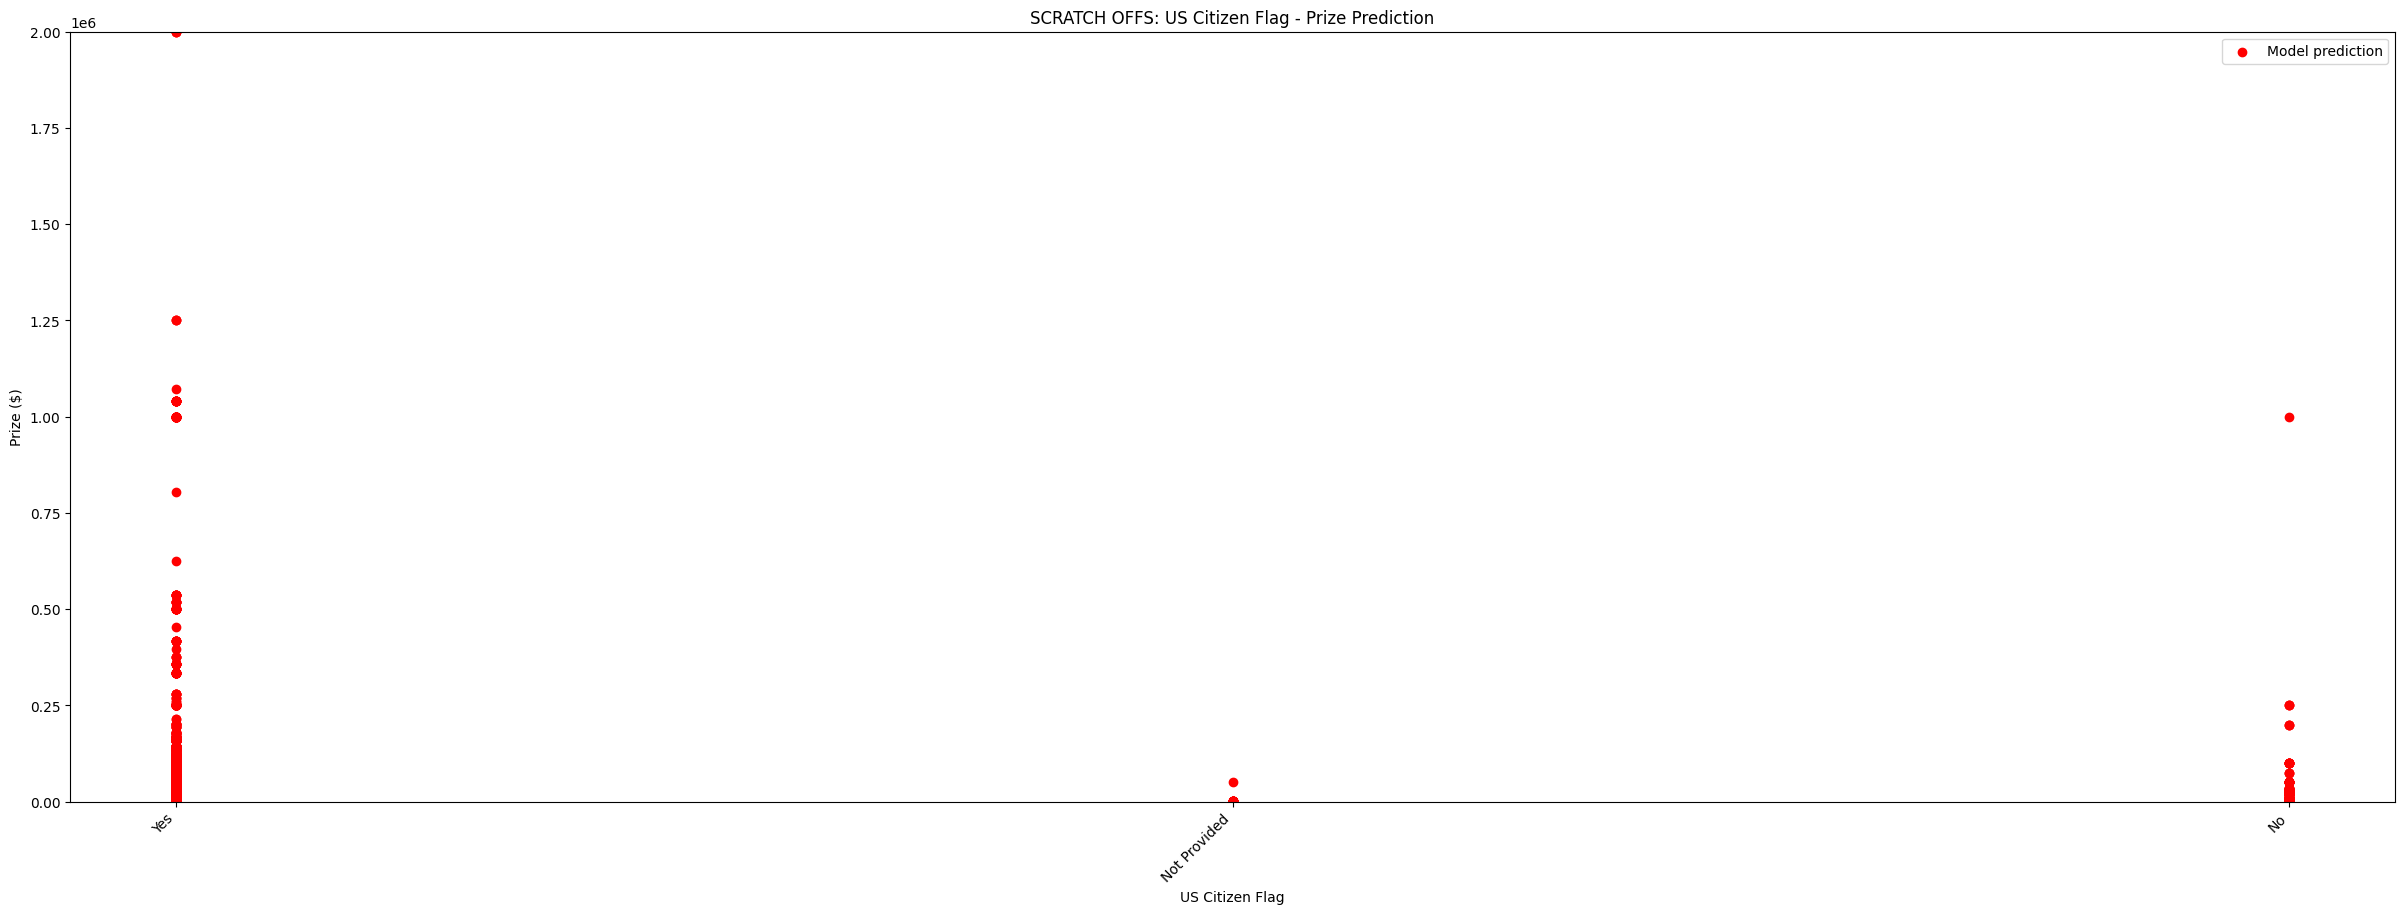

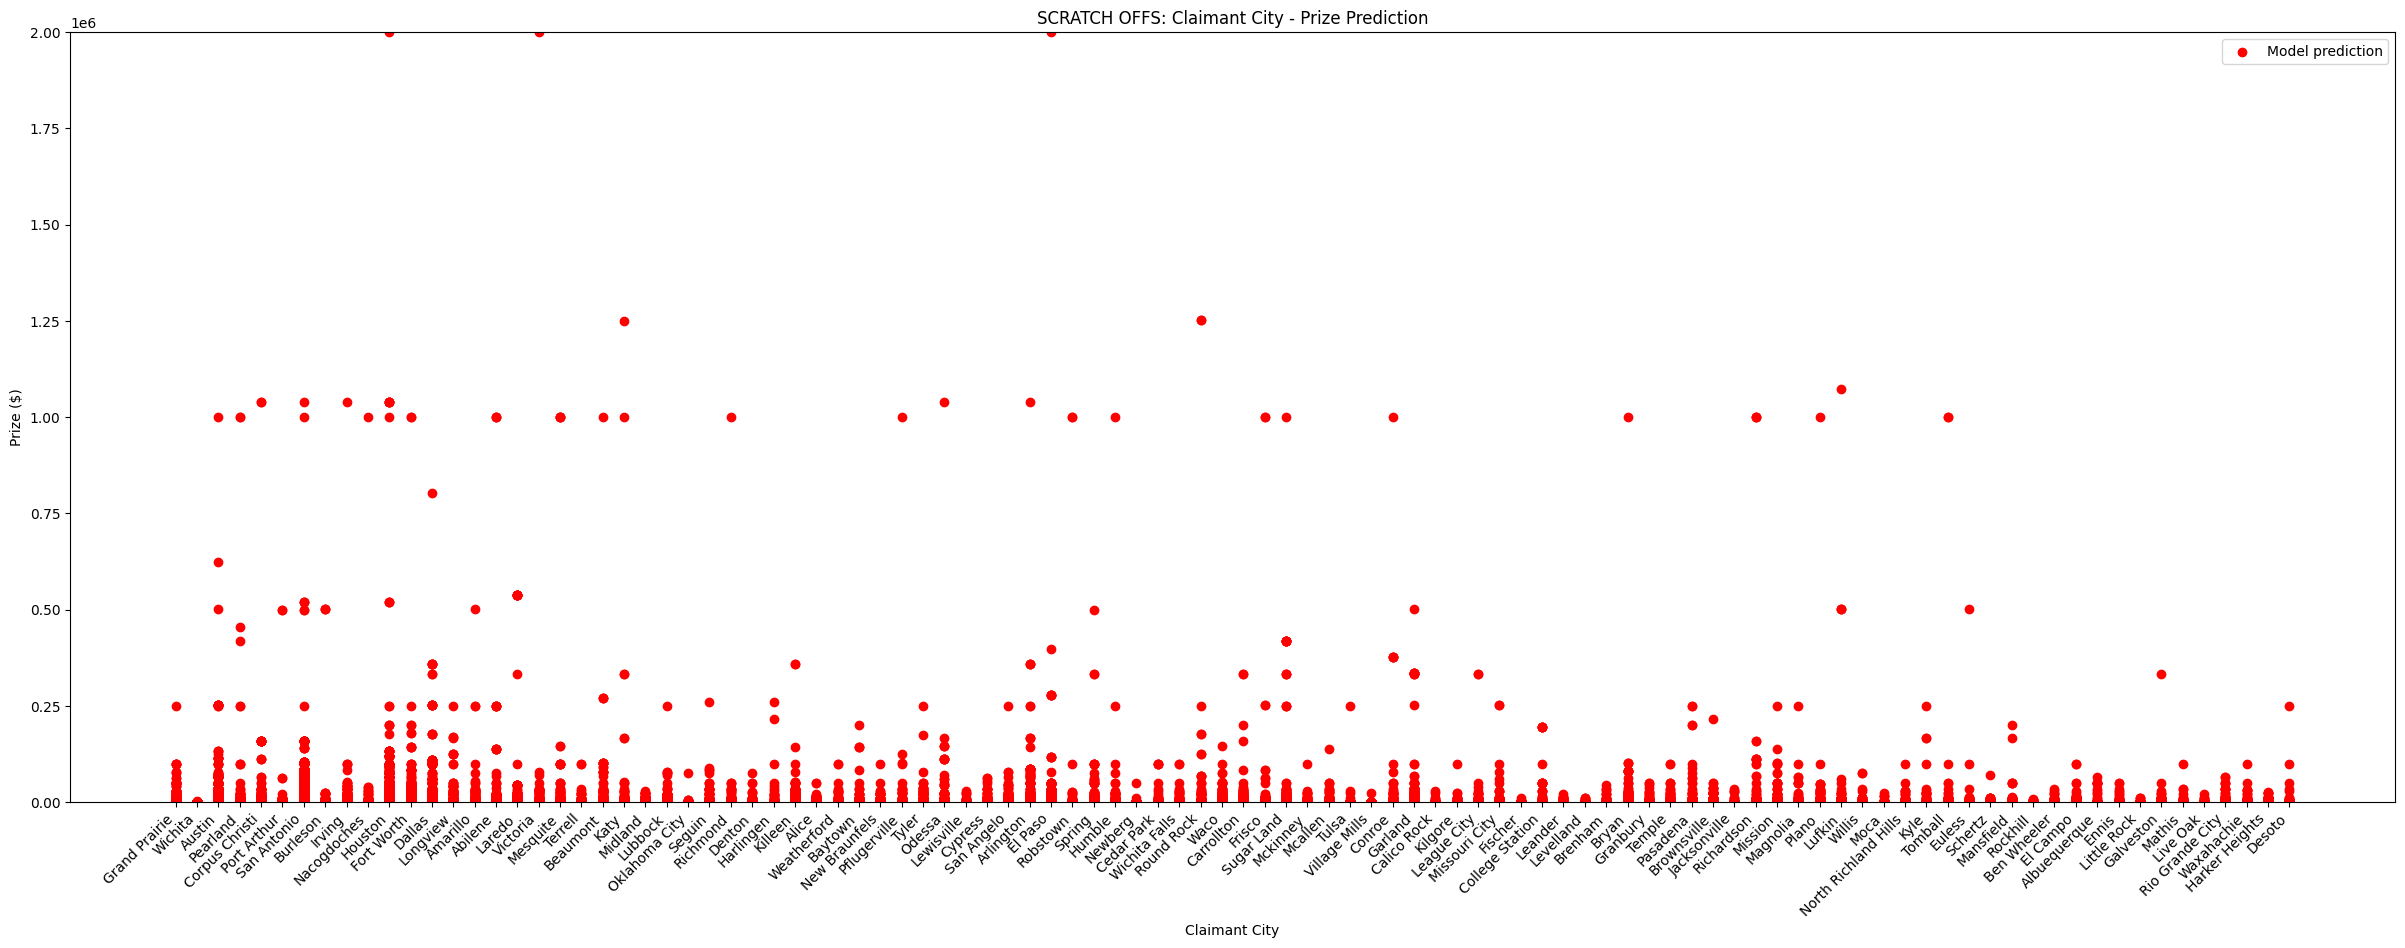

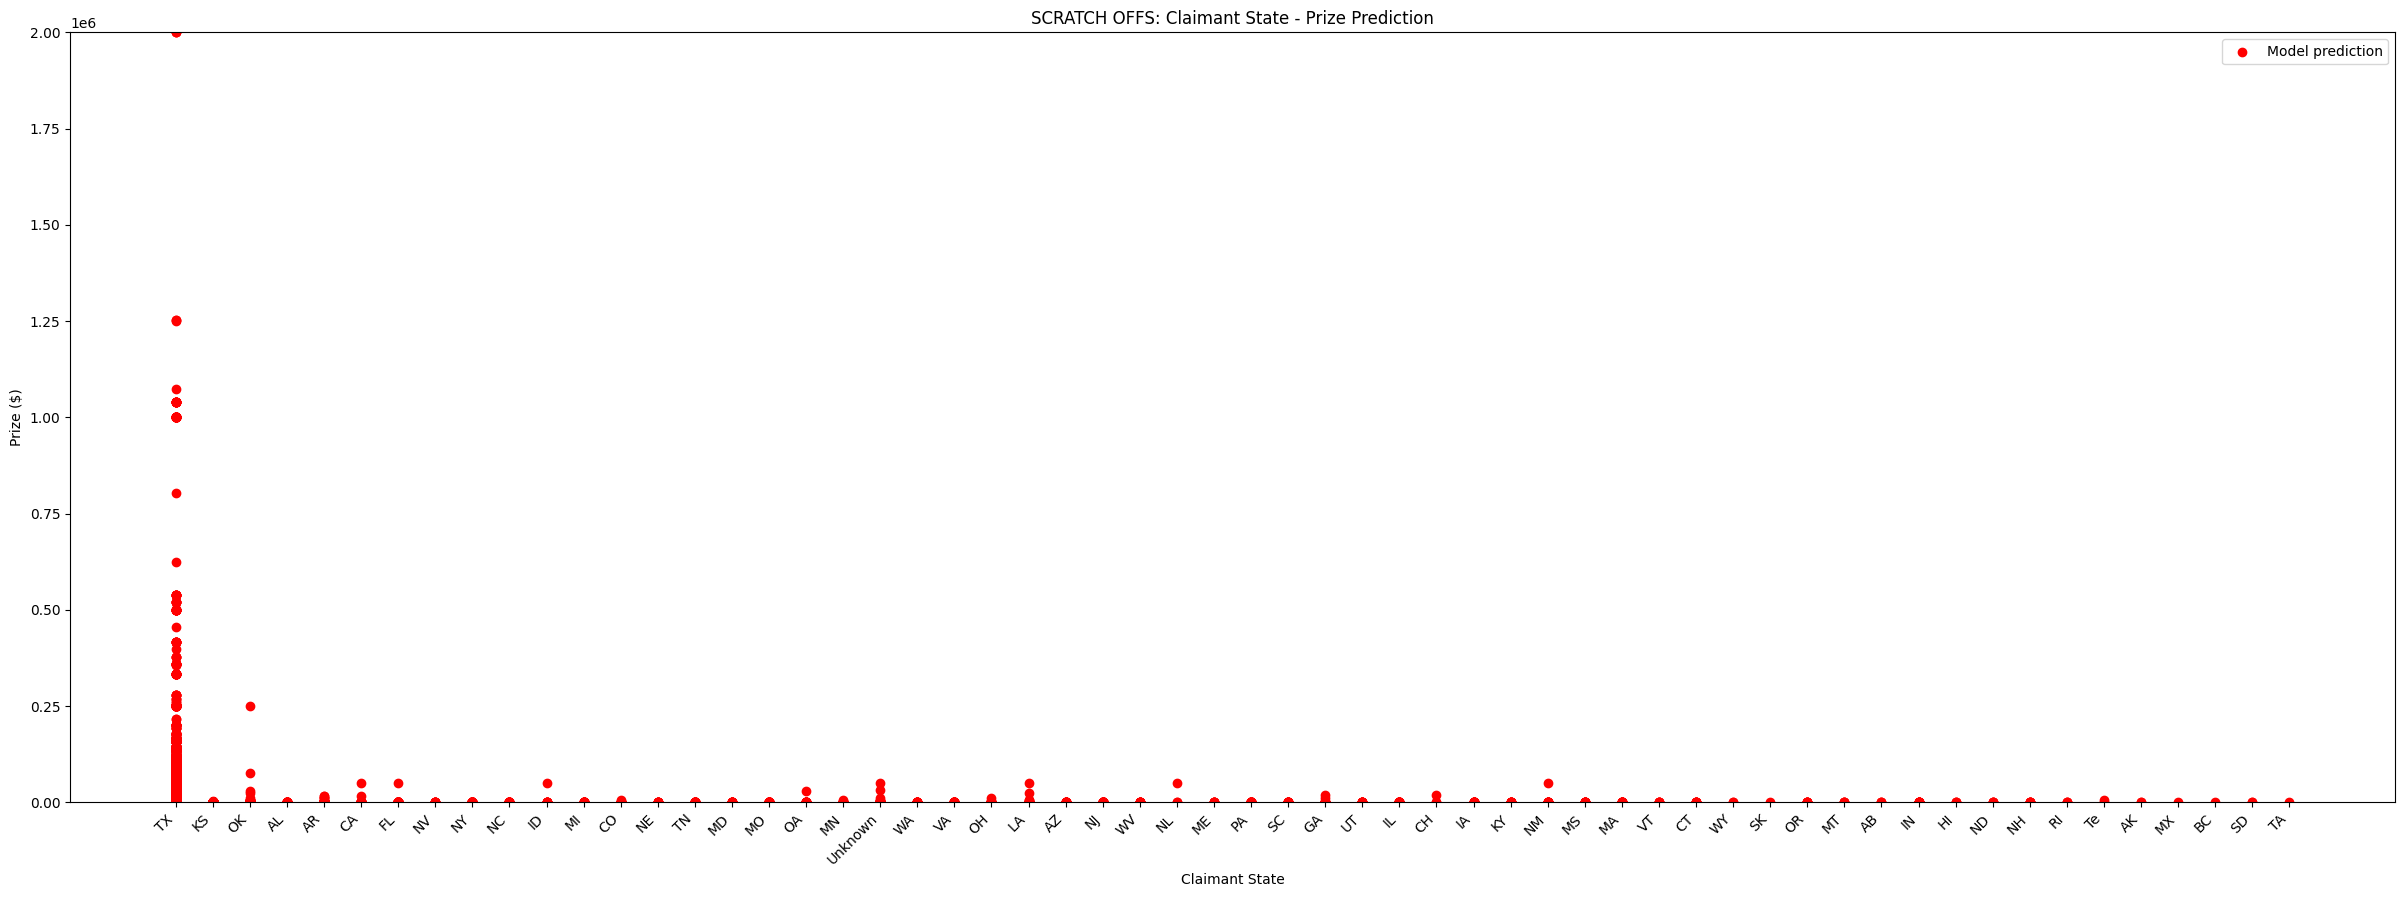

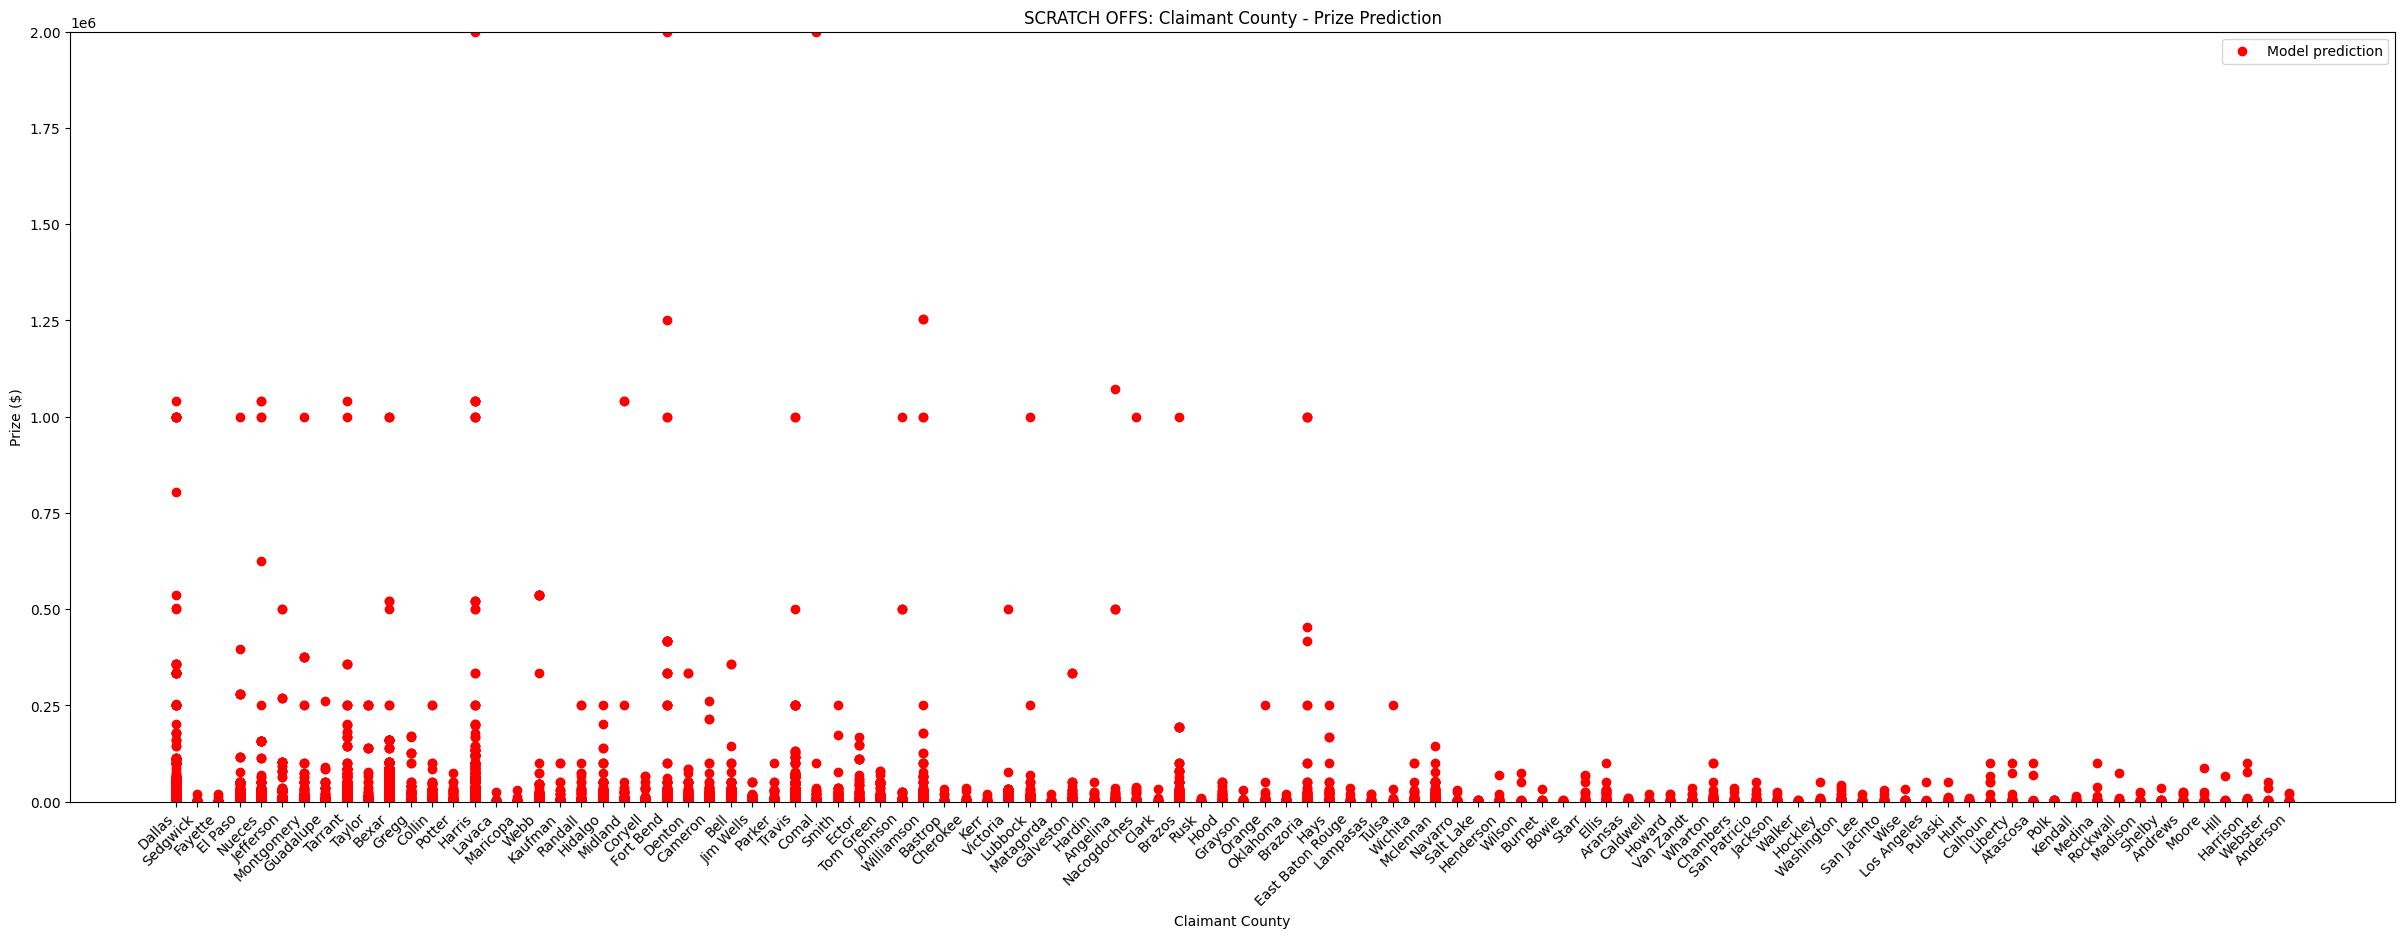

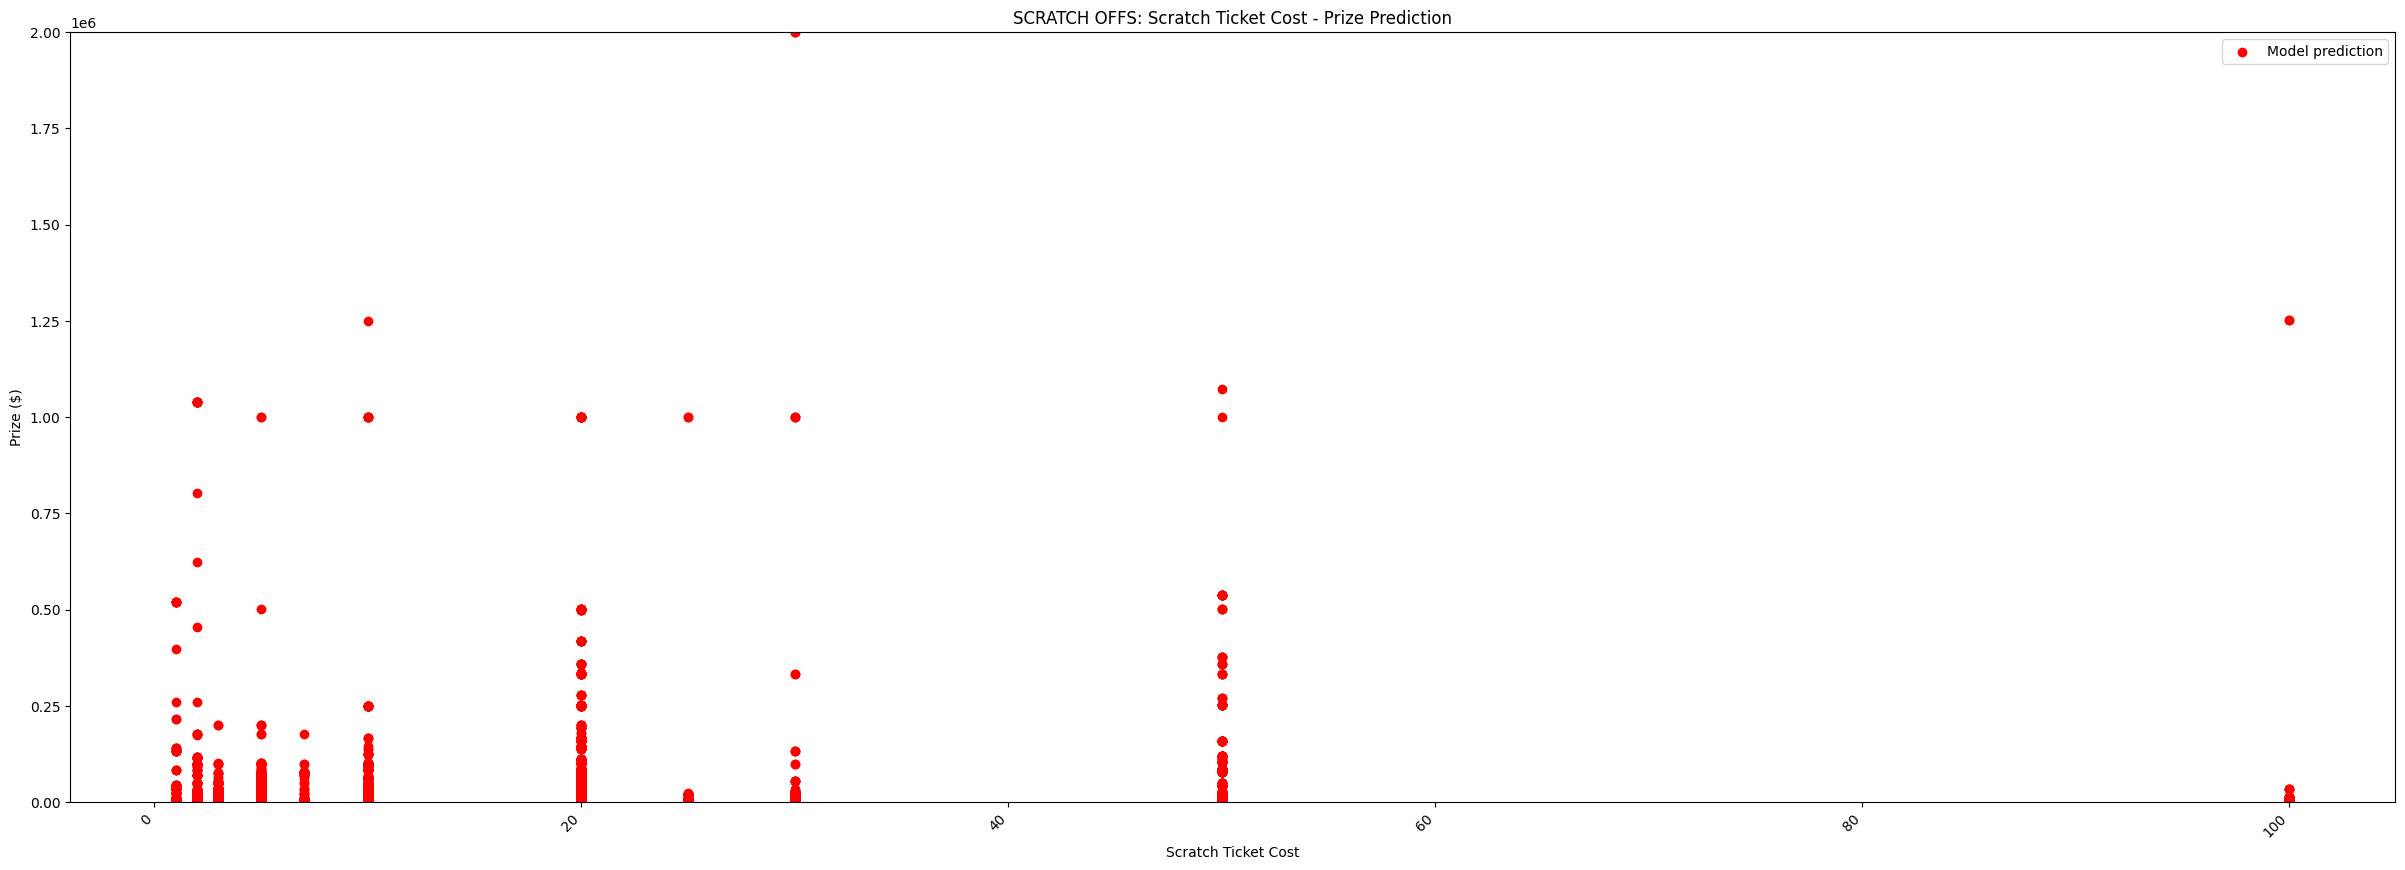

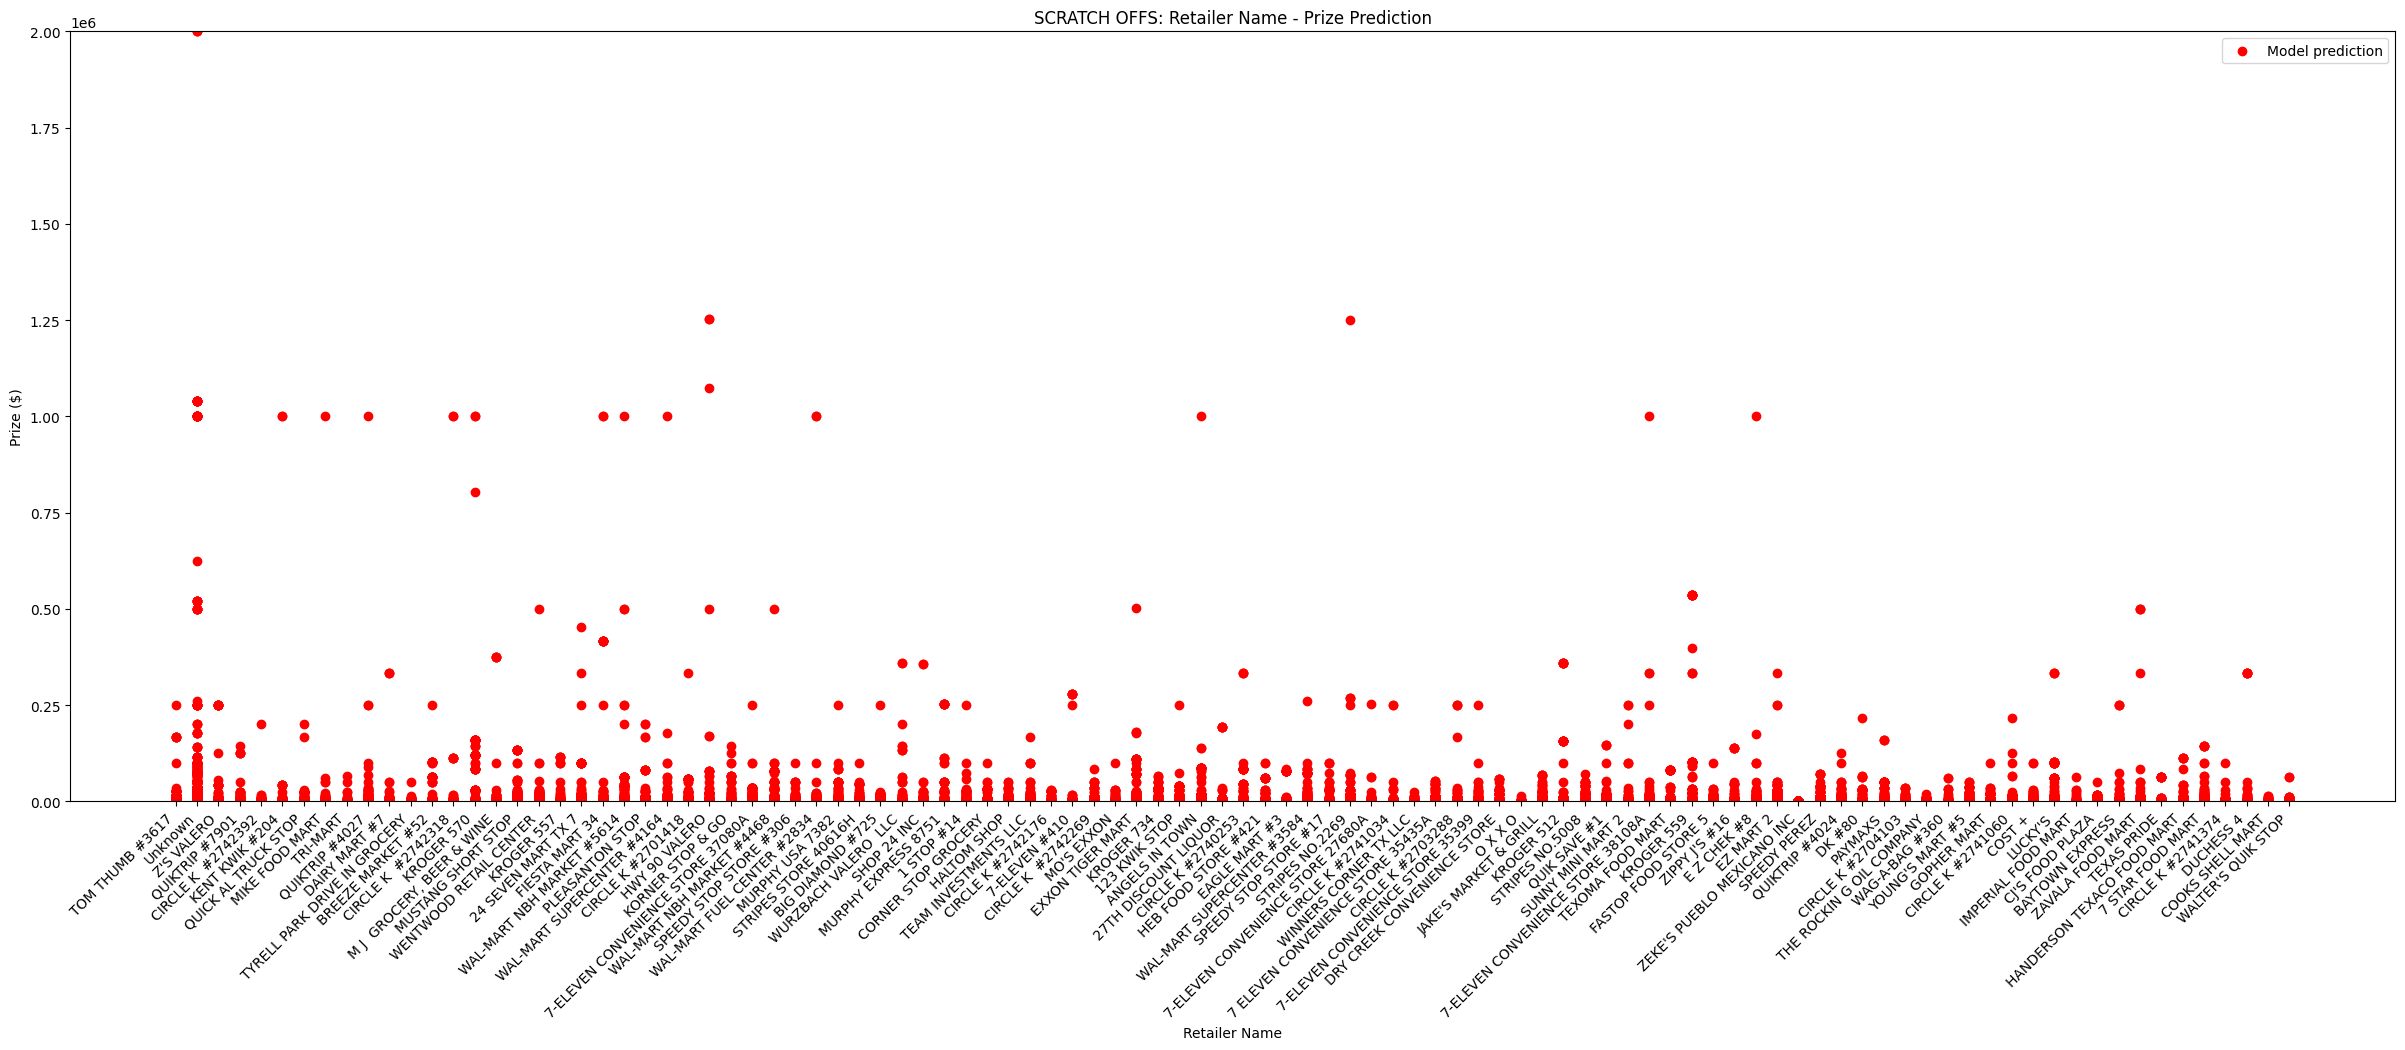

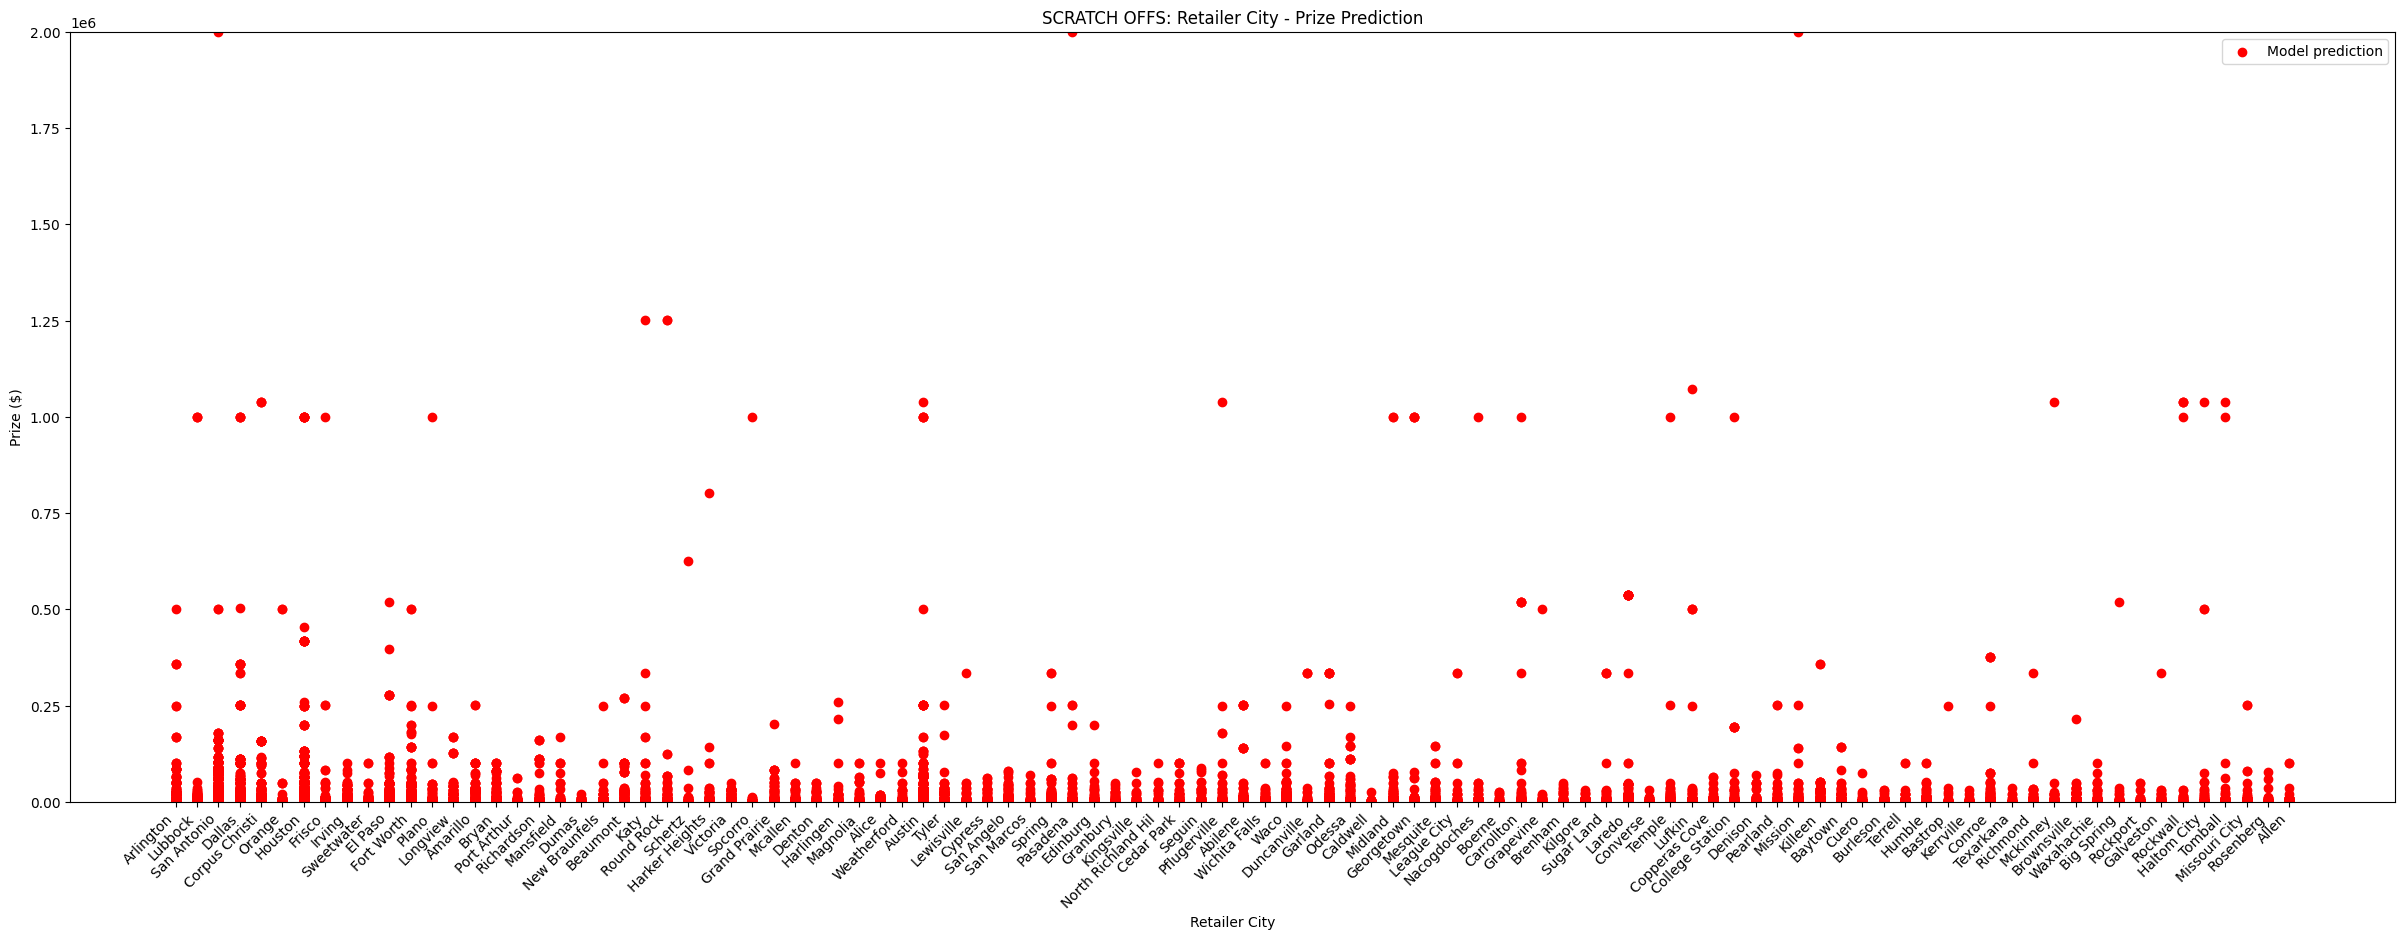

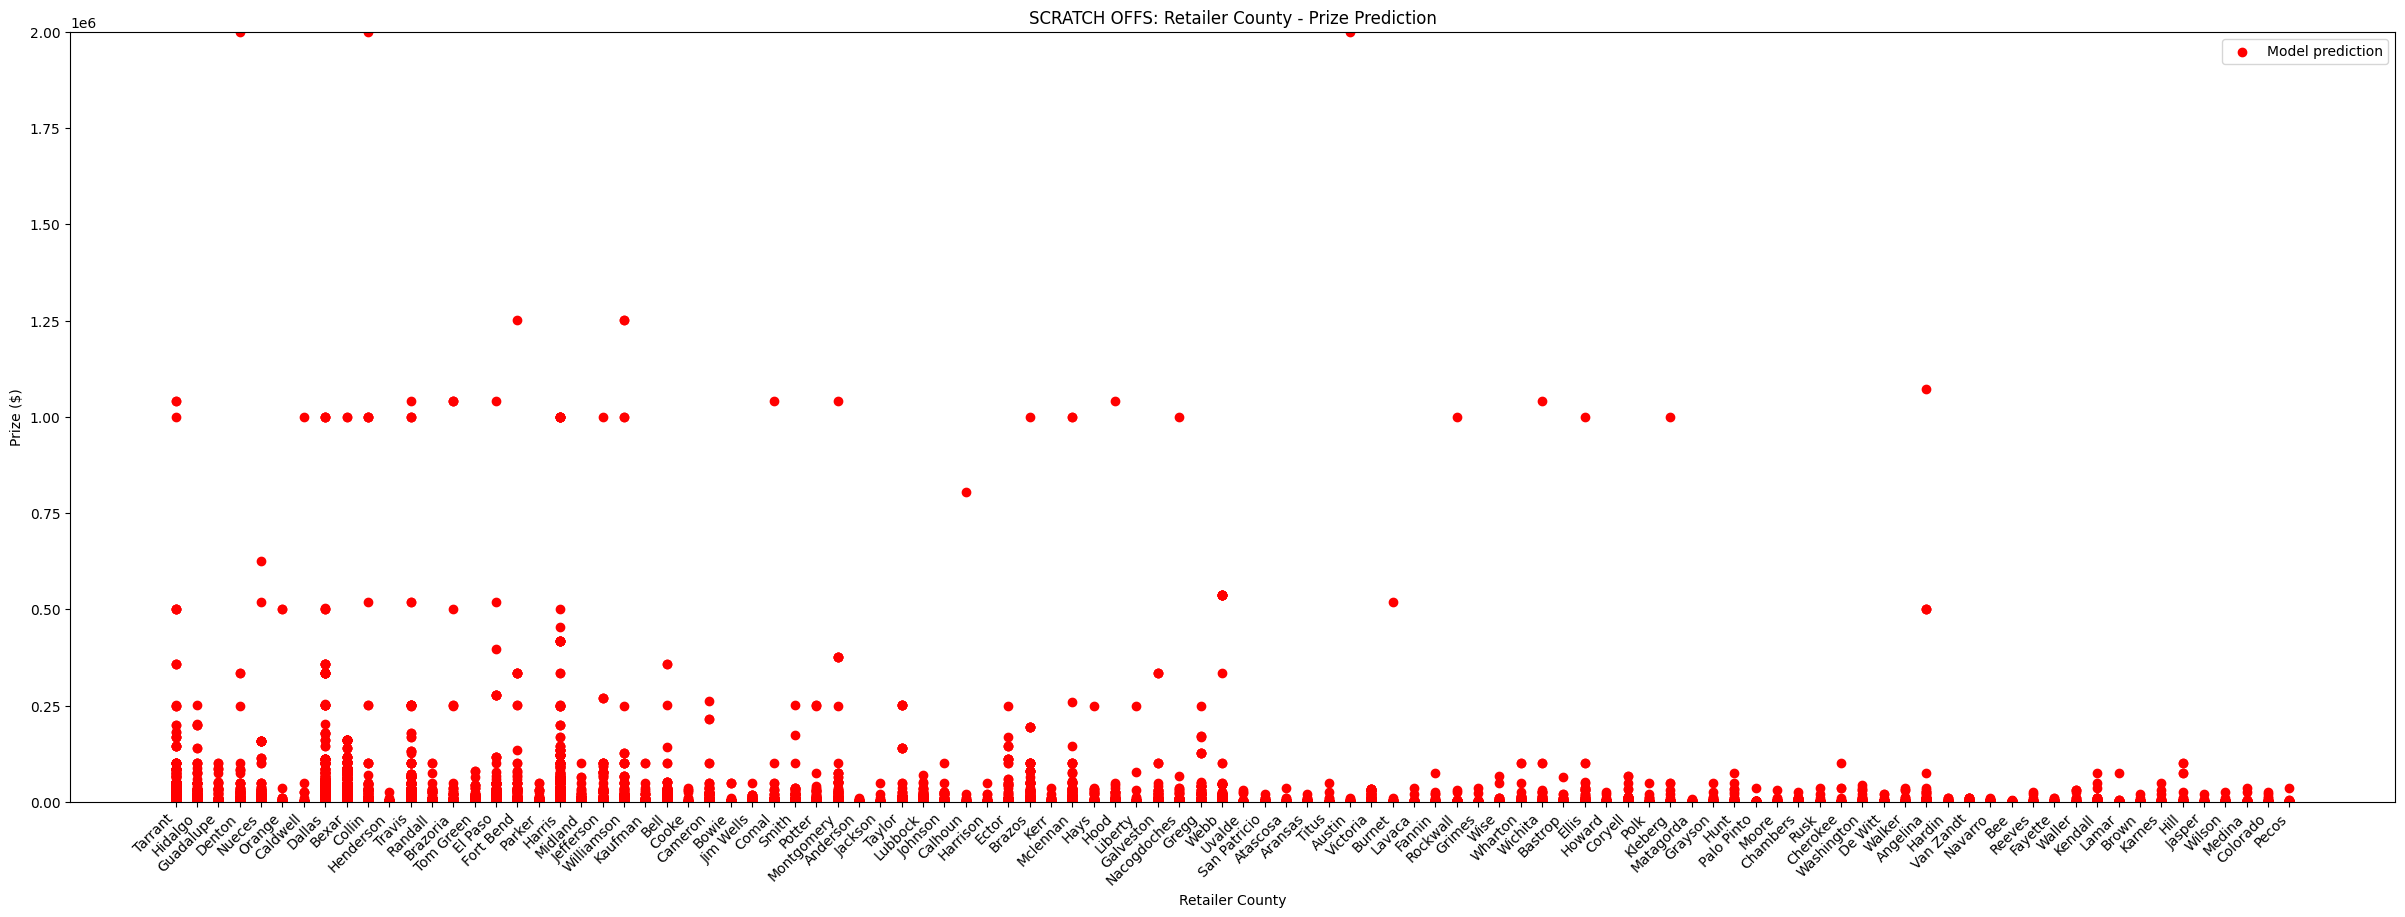

In [28]:
# Visualize the Decision Tree prediction
for column in X_se.columns:
    plt.figure(figsize=(30, 10))
    plt.scatter(X_sd[column], filtered_y_s_pred, color='red', label='Model prediction')
    plt.xticks(rotation=45, ha='right')  # Rotate x labels
    plt.ylim(0, 2000000)  # Set y limits
    plt.xlabel(column)
    plt.ylabel('Prize ($)')
    plt.title('SCRATCH OFFS: ' + column + ' - Prize Prediction')
    plt.legend()
    plt.show()


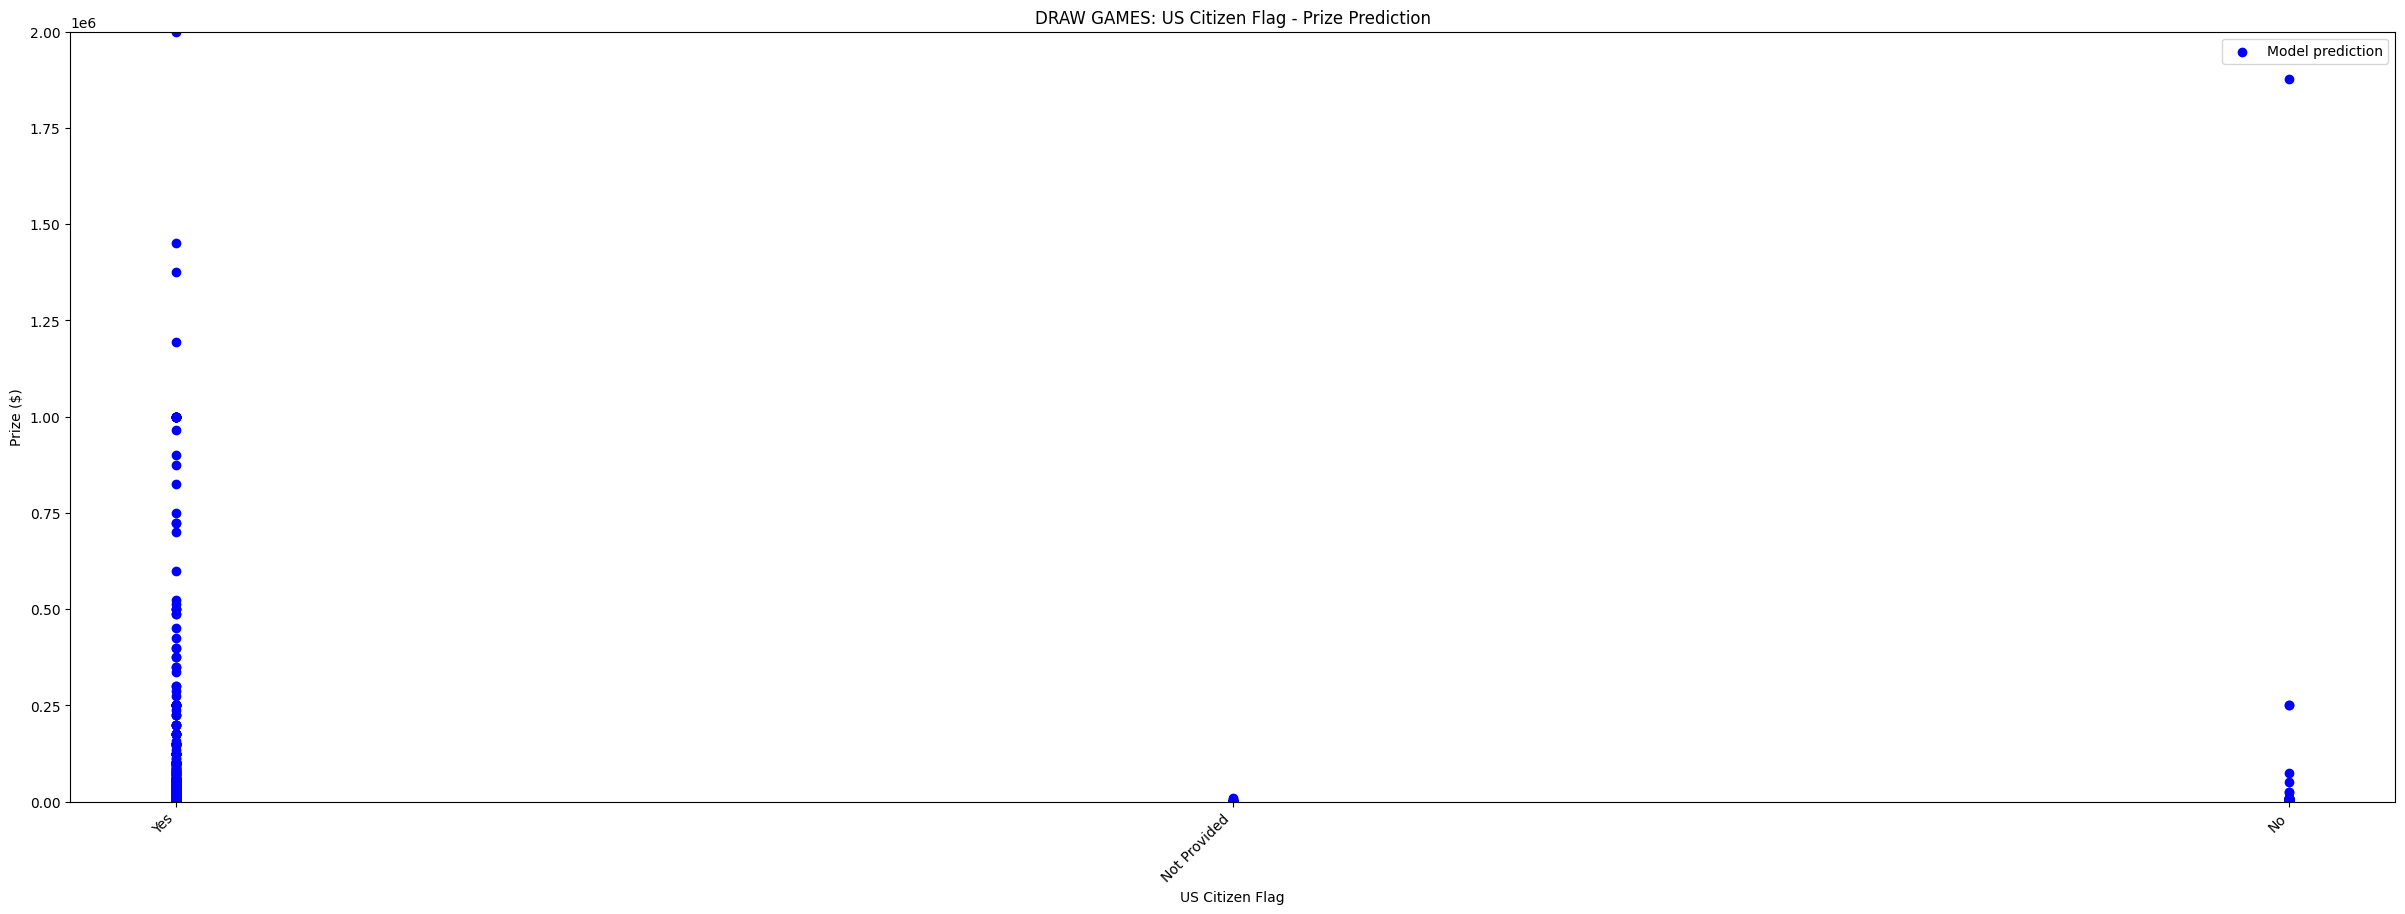

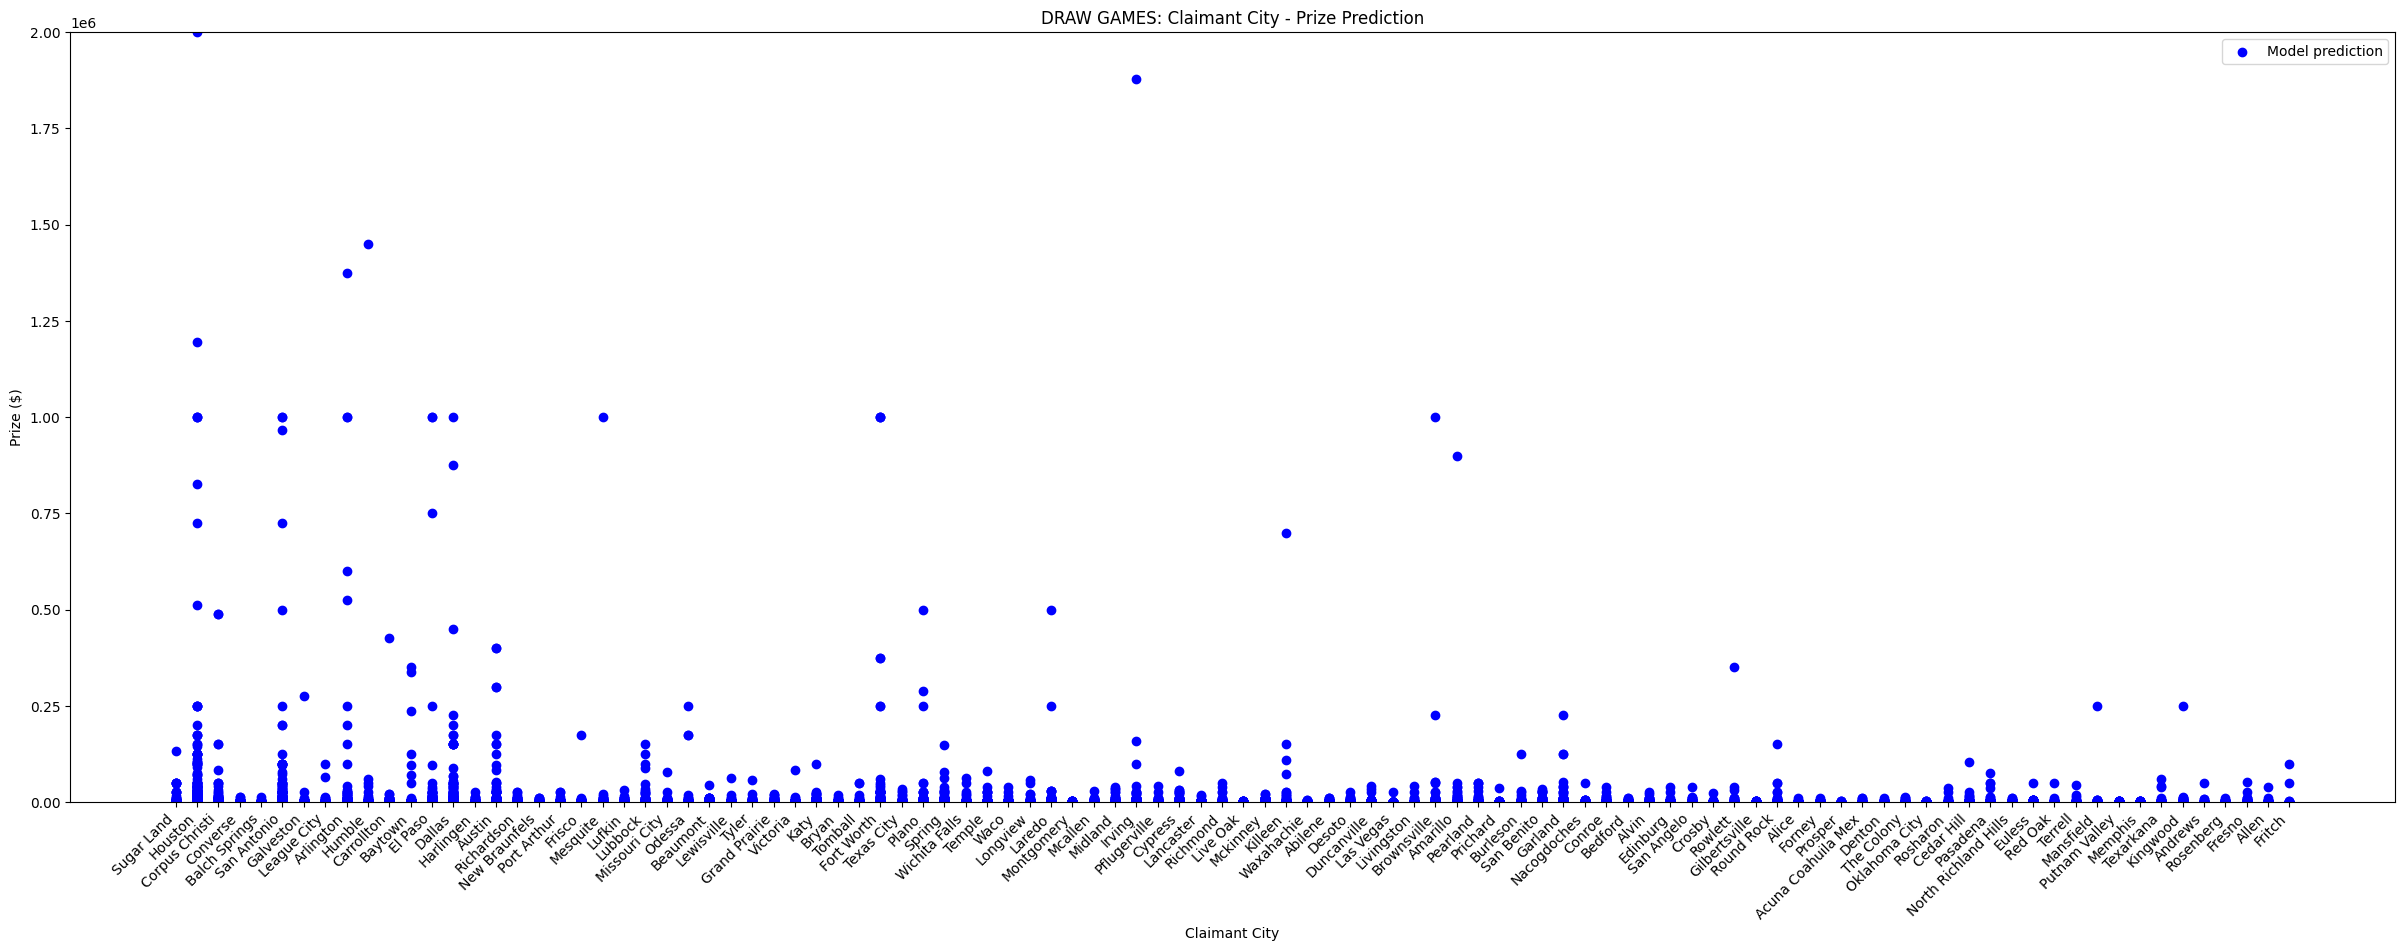

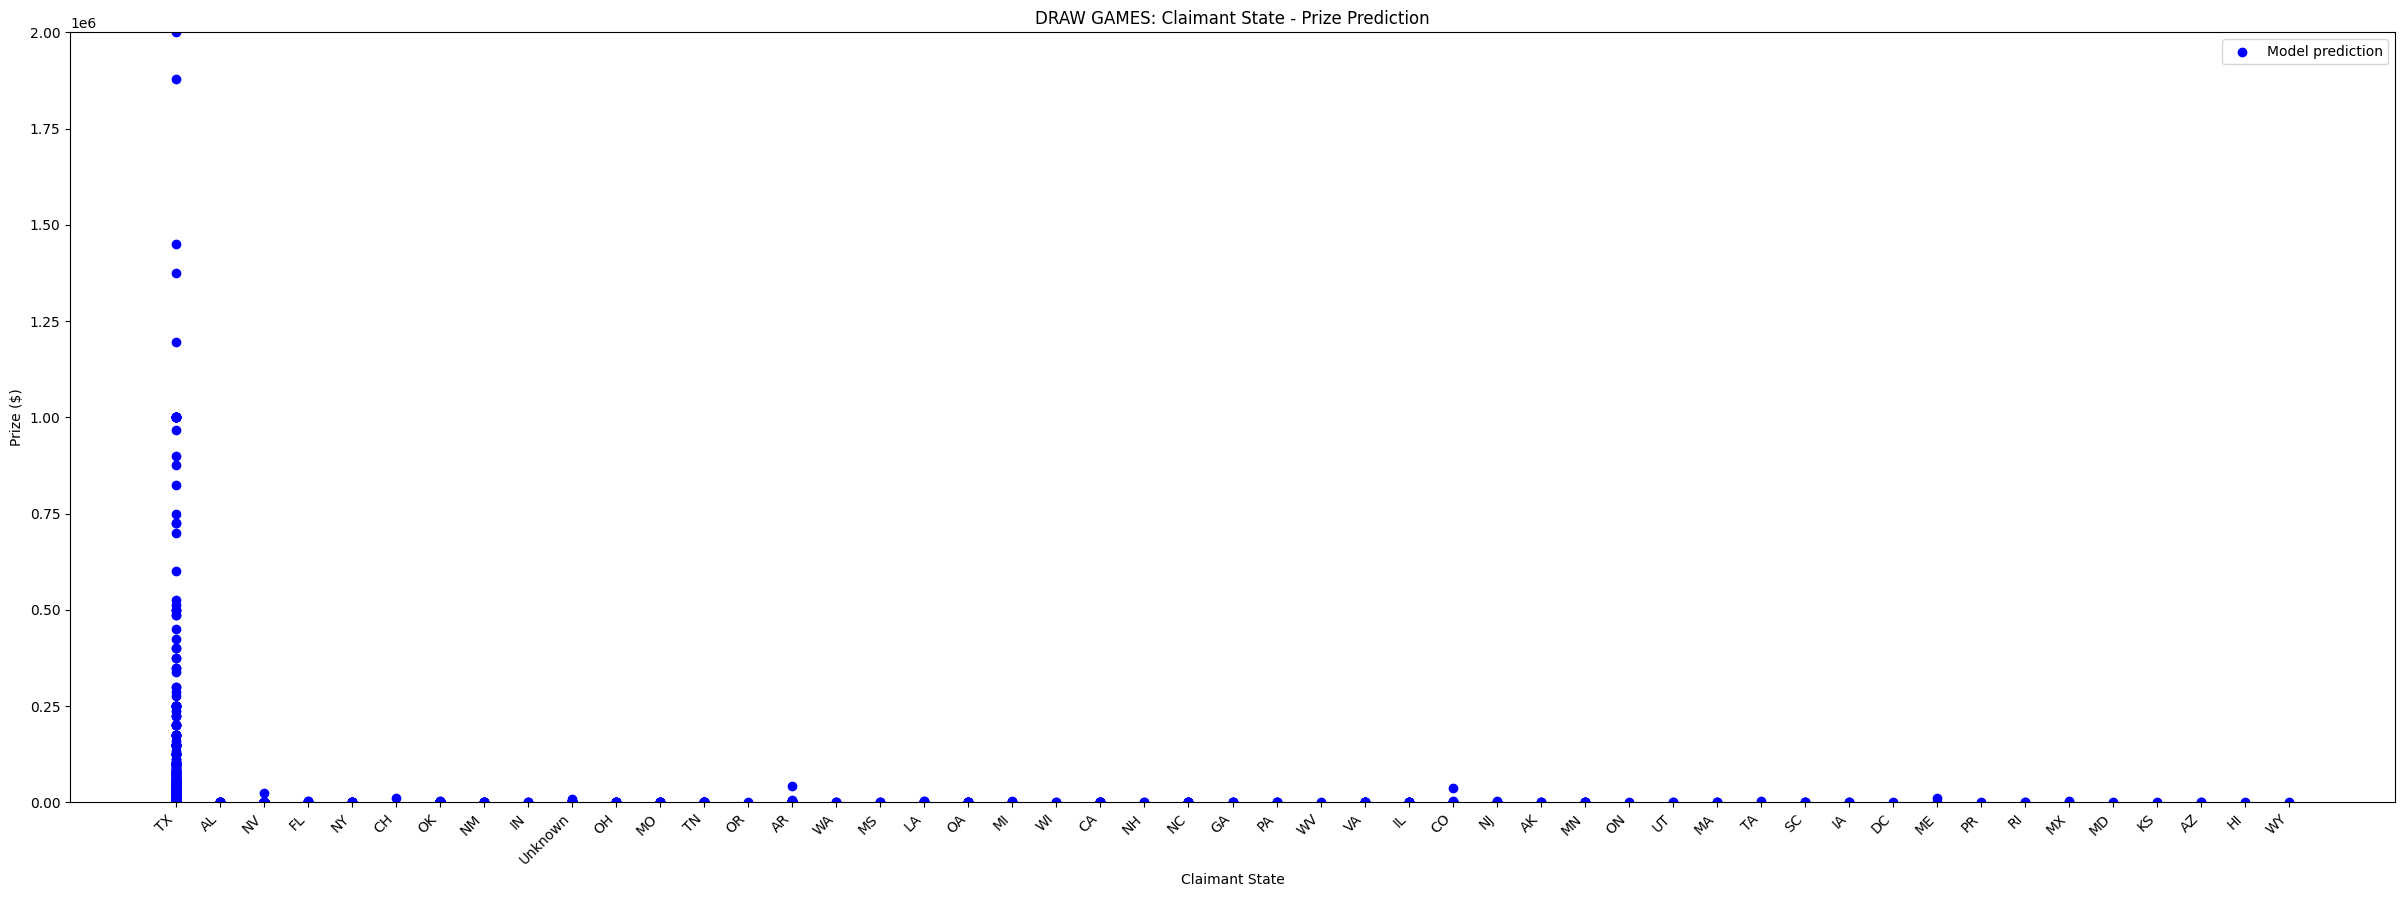

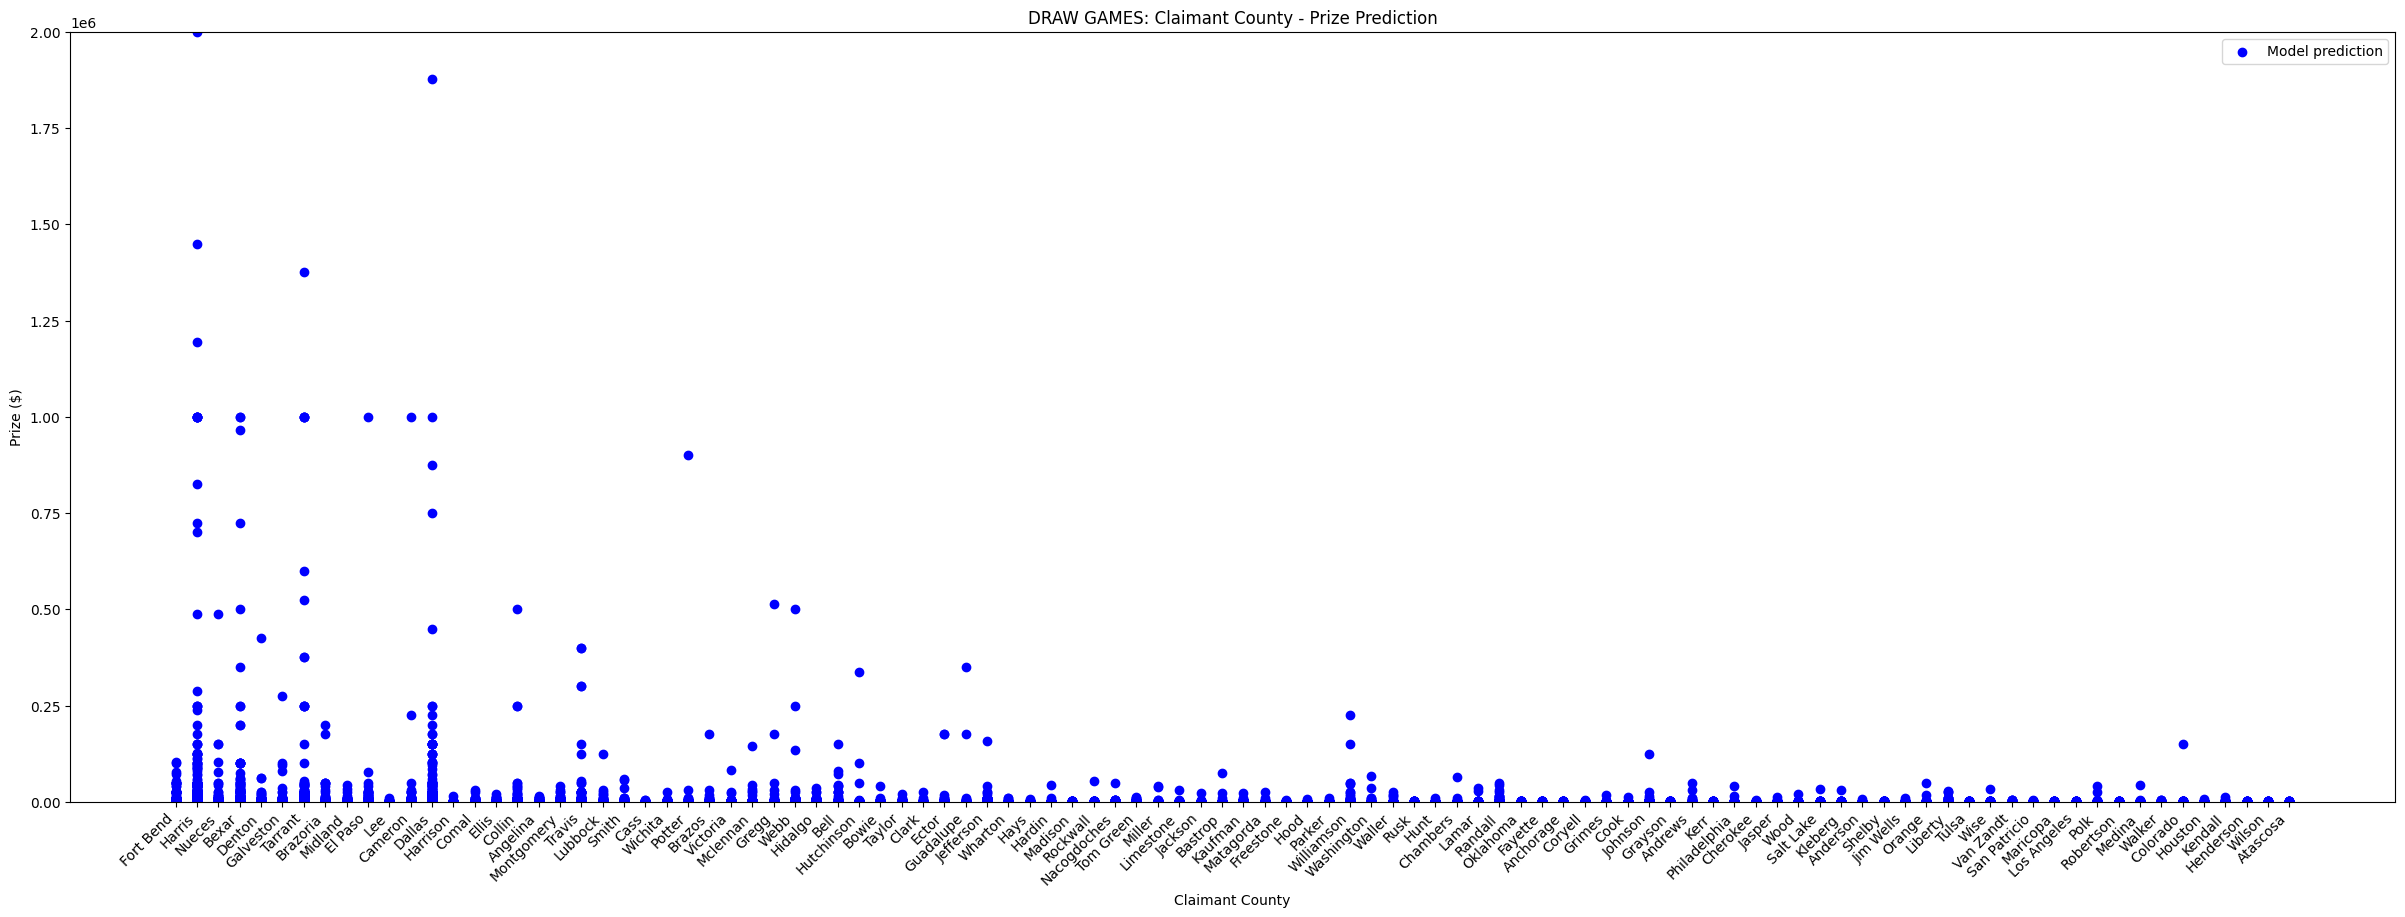

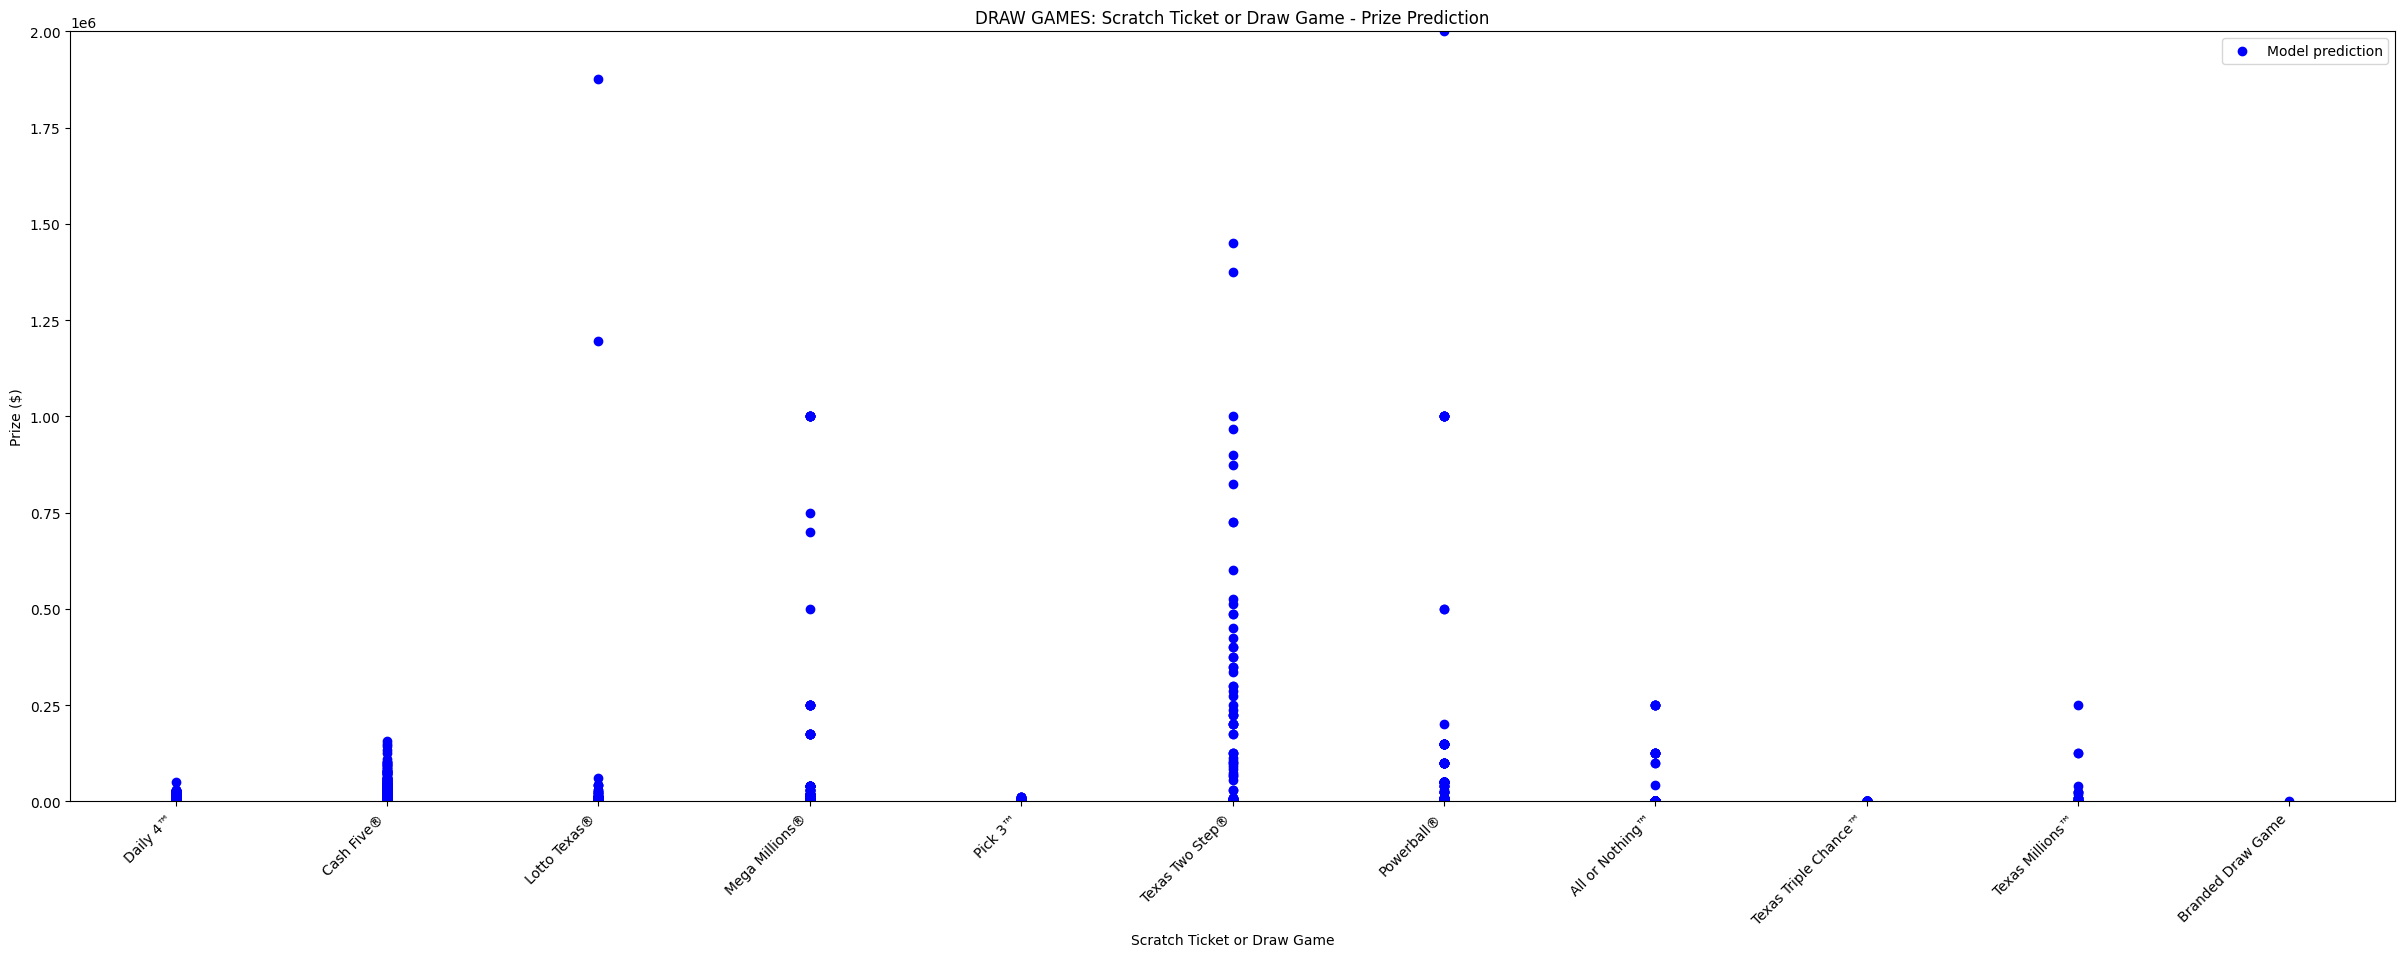

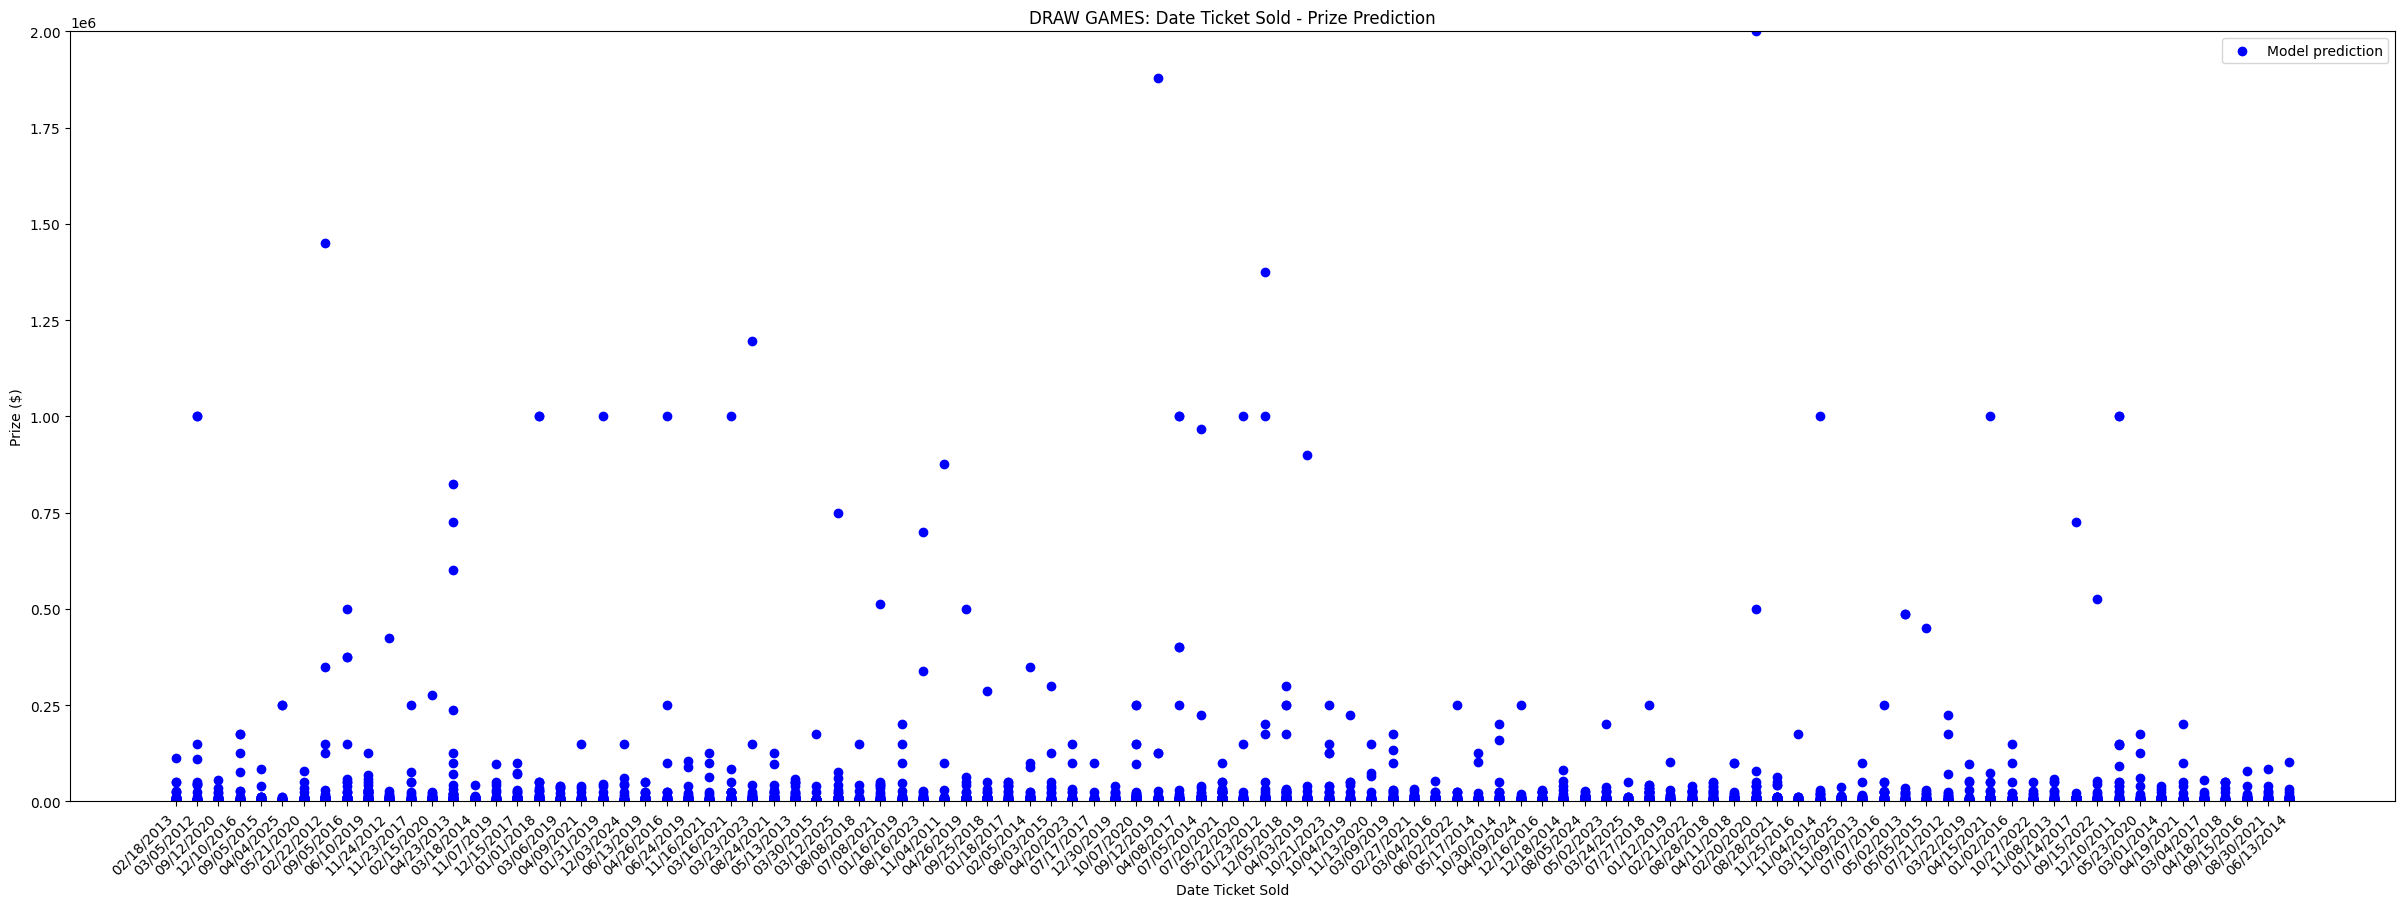

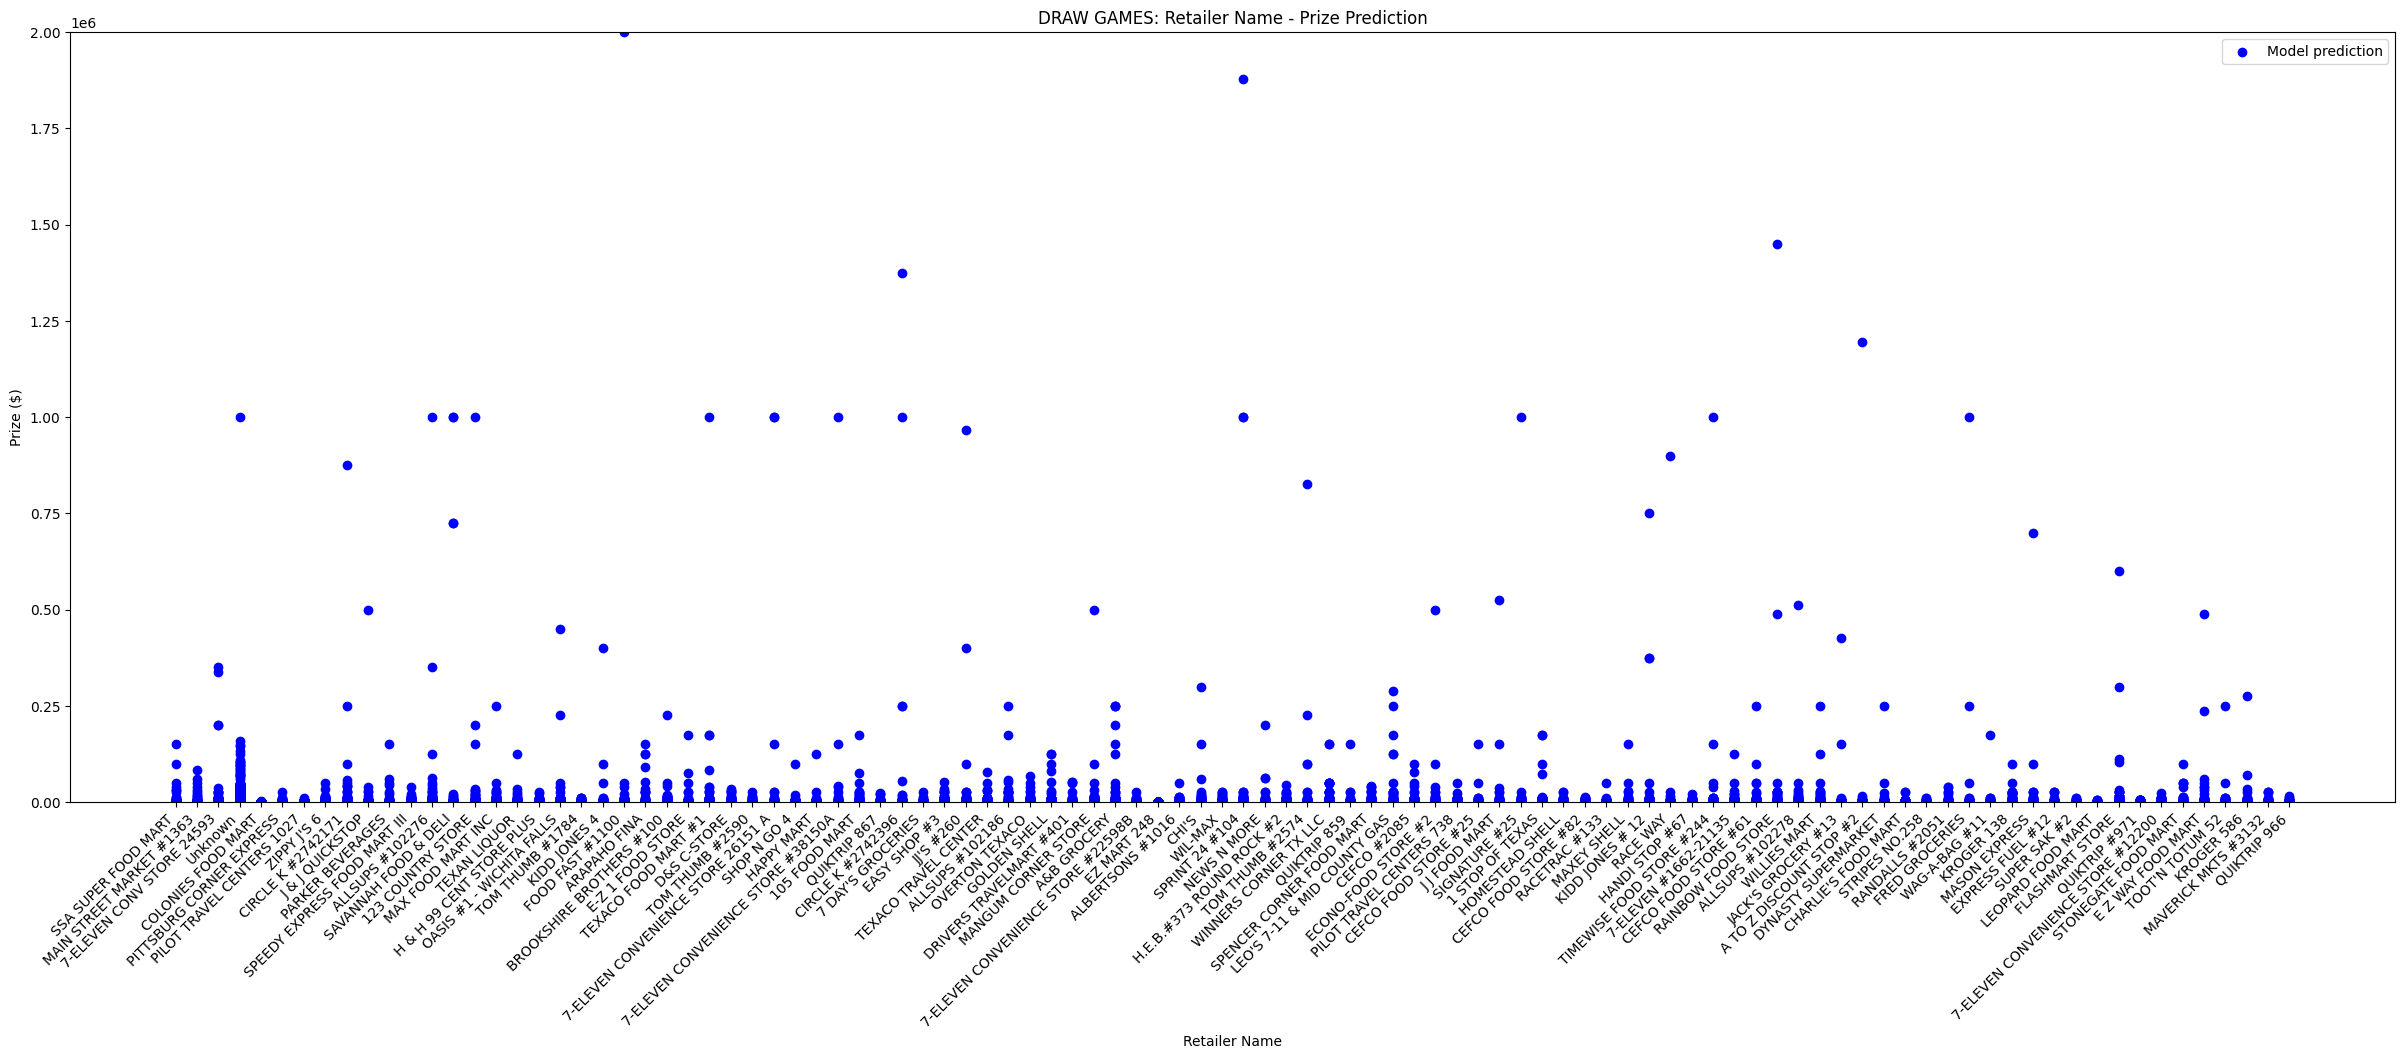

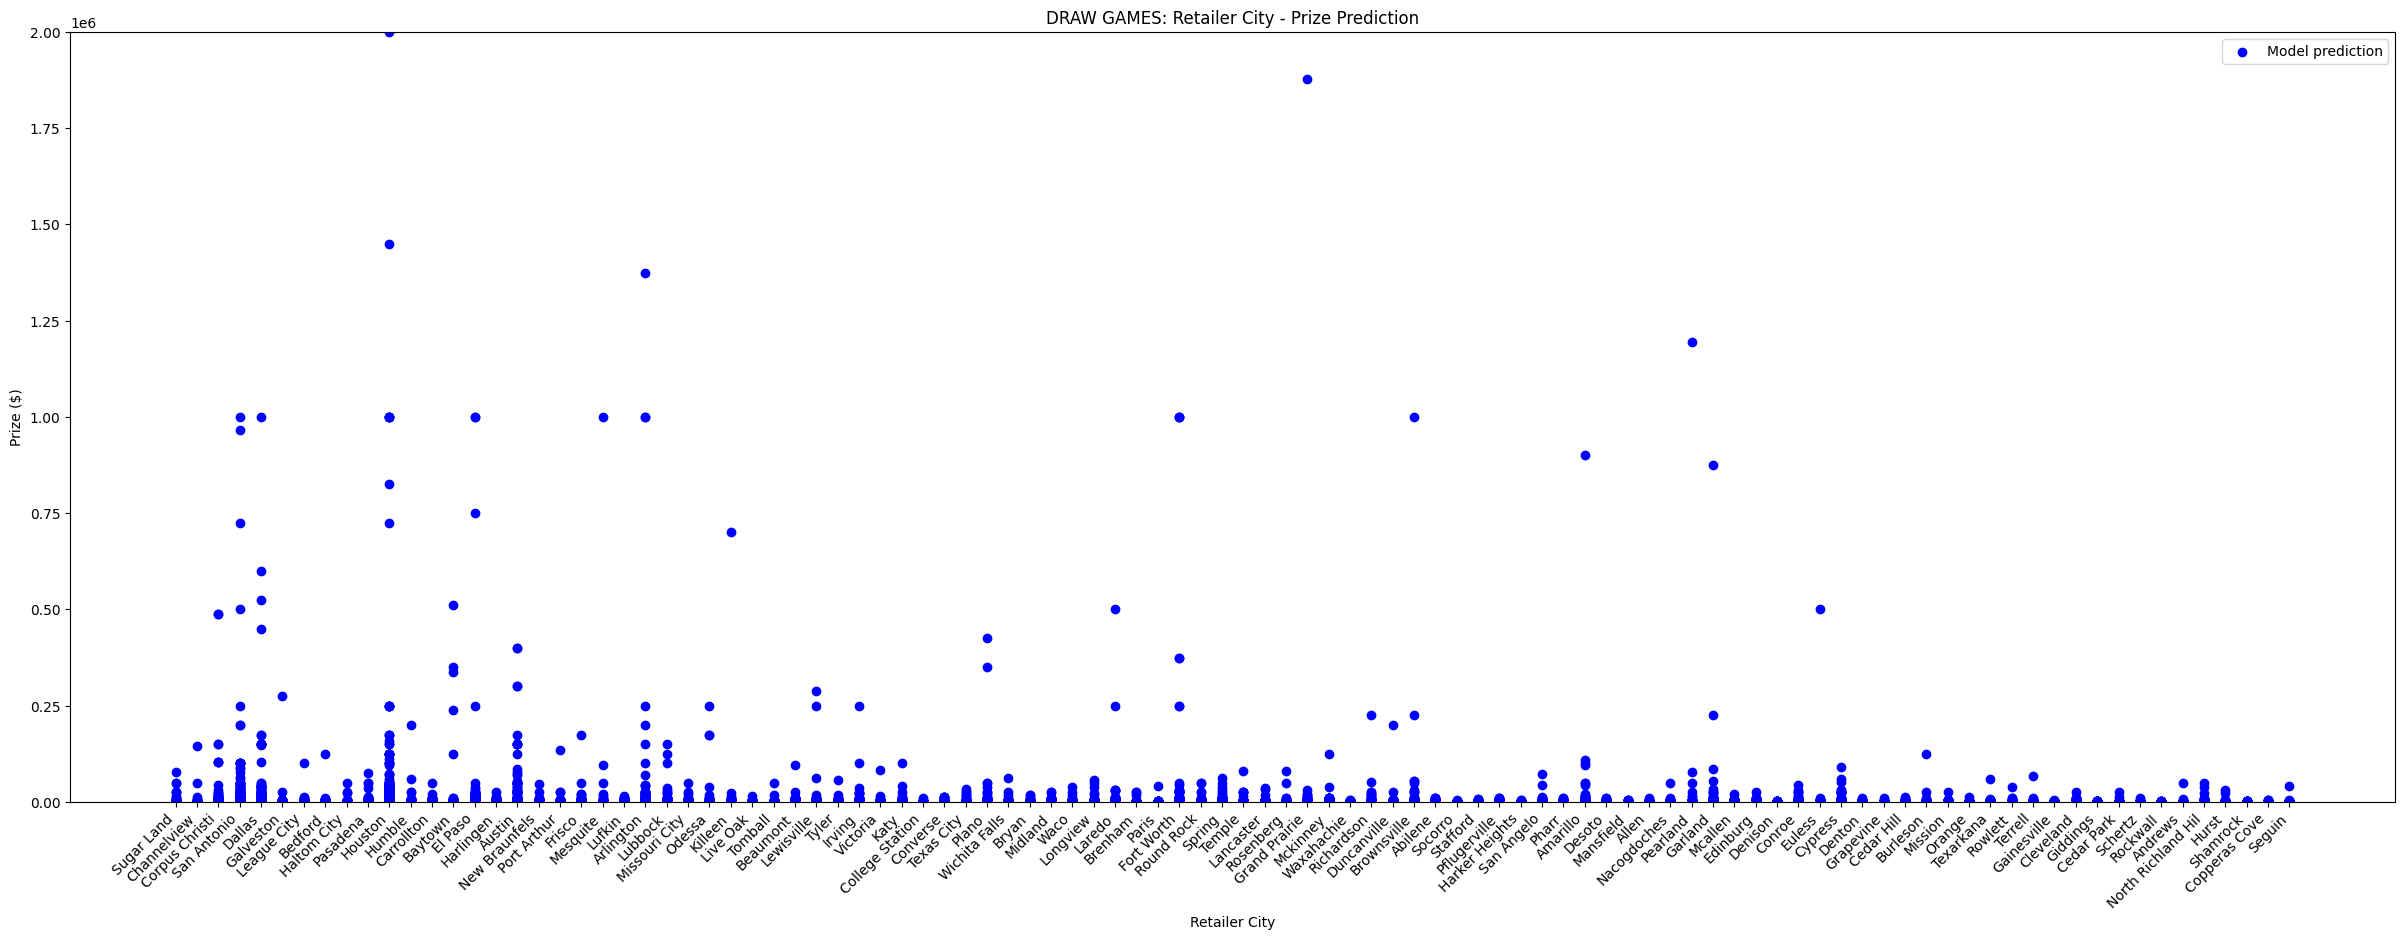

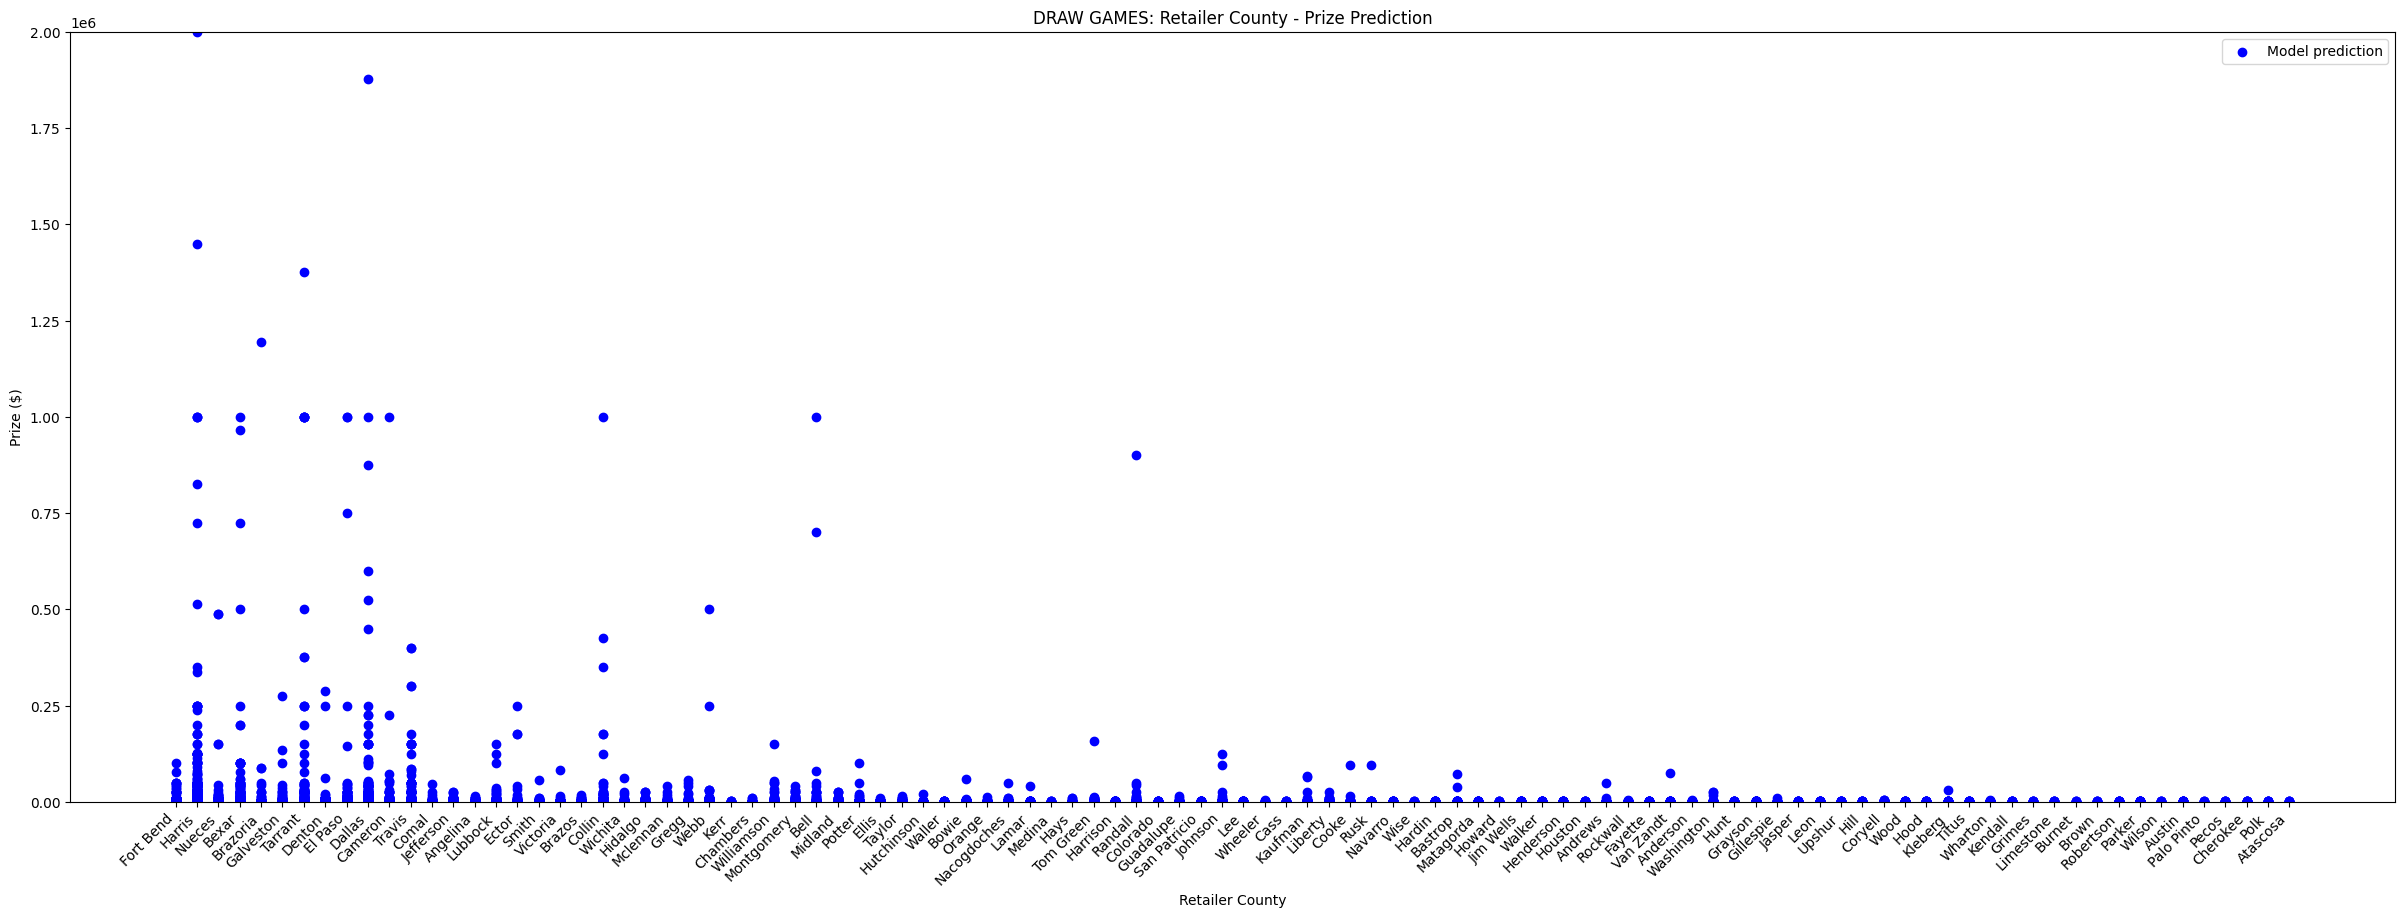

In [29]:
# Visualize the Decision Tree prediction
for column in X_de.columns:
    plt.figure(figsize=(30, 10))
    plt.scatter(X_dd[column], filtered_y_d_pred, color='blue', label='Model prediction')
    plt.xticks(rotation=45, ha='right')  # Rotate x labels
    plt.ylim(0, 2000000)  # Set y limits
    plt.xlabel(column)
    plt.ylabel('Prize ($)')
    plt.title('DRAW GAMES: ' + column + ' - Prize Prediction')
    plt.legend()
    plt.show()

In [30]:
for column in X_sd.columns:
    # Ensure the data is 1-dimensional
    Xs_column = X_sd[column].ravel() 
    ys_values = np.exp(filtered_y_s_pred).ravel()  # undo log transformation

    # Combine them into a DataFrame
    dfs = pd.DataFrame({
        column: Xs_column,
        'y_values': ys_values
    })

    # Group by 'US Citizen Flag' and calculate the sum of 'y_values' and count the occurrences
    groupeds = dfs.groupby(column).agg(
        Total_Prize=('y_values', 'sum'),
        count=('y_values', 'size')
    )

    # Calculate the average (total y / count)
    groupeds['Average_Prize'] = groupeds['Total_Prize'] / groupeds['count']

    # Print the results
    print(groupeds)

    # Find the category with the highest count
    max_count_categorys = groupeds['count'].idxmax()  # Get the category with max count
    max_countss = groupeds.loc[max_count_categorys, 'count']
    max_average_prizes = groupeds.loc[max_count_categorys, 'Average_Prize']

    print(f"\nCategory with highest count for {column}:")
    print(f"Category: {max_count_categorys} | Count: {max_countss} | Average Prize: ${max_average_prizes:.2f}\n")

    # Sort the grouped data by 'Average_Prize' in descending order for the top 3 max
    top_3_max_s = groupeds.nlargest(3, 'Average_Prize')

    # Sort the grouped data by 'Average_Prize' in ascending order for the bottom 3 min
    bottom_3_min_s = groupeds.nsmallest(3, 'Average_Prize')

    # Print the results along with their indices (IDs)
    print("Top 3 Maximum Average Prize")
    for idx, row in top_3_max_s.iterrows():
        print(f"{row.name:<13} Average Prize: ${row['Average_Prize']} Count: {int(row['count'])}")

    print("\nBot 3 Minimum Average Prize")
    for idx, row in bottom_3_min_s.iterrows():
        print(f"{row.name:<13} Average Prize: ${row['Average_Prize']} Count: {int(row['count'])}")

    print("\n\n")

                 Total_Prize   count  Average_Prize
US Citizen Flag                                    
No                       inf    1952            inf
Not Provided             inf   14859            inf
Yes                      inf  156958            inf

Category with highest count for US Citizen Flag:
Category: Yes | Count: 156958 | Average Prize: $inf

Top 3 Maximum Average Prize
No            Average Prize: $inf Count: 1952
Not Provided  Average Prize: $inf Count: 14859
Yes           Average Prize: $inf Count: 156958

Bot 3 Minimum Average Prize
No            Average Prize: $inf Count: 1952
Not Provided  Average Prize: $inf Count: 14859
Yes           Average Prize: $inf Count: 156958



               Total_Prize  count  Average_Prize
Claimant City                                   
Abilene                inf   1599            inf
Albuequerque           inf    287            inf
Alice                  inf    461            inf
Amarillo               inf   7295            inf
A

C:\Users\fukud\AppData\Local\Temp\ipykernel_12868\922325242.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  Xs_column = X_sd[column].ravel()
C:\Users\fukud\AppData\Local\Temp\ipykernel_12868\922325242.py:4: RuntimeWarning: overflow encountered in exp
  ys_values = np.exp(filtered_y_s_pred).ravel()  # undo log transformation
C:\Users\fukud\AppData\Local\Temp\ipykernel_12868\922325242.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  Xs_column = X_sd[column].ravel()
C:\Users\fukud\AppData\Local\Temp\ipykernel_12868\922325242.py:4: RuntimeWarning: overflow encountered in exp
  ys_values = np.exp(filtered_y_s_pred).ravel()  # undo log transformation
C:\Users\fukud\AppData\Local\Temp\ipykernel_12868\922325242.py:3: FutureWarning: Series.ravel is d

In [31]:
for column in X_dd.columns:
    # Ensure the data is 1-dimensional
    Xd_column = X_dd[column].ravel() 
    yd_values = np.exp(filtered_y_d_pred).ravel()  # undo log transformation

    # Combine them into a DataFrame
    dfd = pd.DataFrame({
        column: Xd_column,
        'y_values': yd_values
    })

    # Group by 'US Citizen Flag' and calculate the sum of 'y_values' and count the occurrences
    groupedd = dfd.groupby(column).agg(
        Total_Prize=('y_values', 'sum'),
        count=('y_values', 'size')
    )

    # Calculate the average (total y / count)
    groupedd['Average_Prize'] = groupedd['Total_Prize'] / groupedd['count']

    # Print the results
    print(groupedd)

     # Find the category with the highest count
    max_count_categoryd = groupedd['count'].idxmax()  # Get the category with max count
    max_countd = groupedd.loc[max_count_categoryd, 'count']
    max_average_prized = groupedd.loc[max_count_categoryd, 'Average_Prize']

    print(f"\nCategory with highest count for {column}:")
    print(f"Category: {max_count_categoryd} | Count: {max_countd} | Average Prize: ${max_average_prized:.2f}\n")

    # Sort the grouped data by 'Average_Prize' in descending order for the top 3 max
    top_3_max_d = groupedd.nlargest(3, 'Average_Prize')

    # Sort the grouped data by 'Average_Prize' in ascending order for the bottom 3 min
    bottom_3_min_d = groupedd.nsmallest(3, 'Average_Prize')

    # Print the results along with their indices (IDs)
    print("Top 3 Maximum Average Prize")
    for idx, row in top_3_max_d.iterrows():
        print(f"{row.name:<13} Average Prize: ${row['Average_Prize']} Count: {int(row['count'])}")

    print("\nBot 3 Minimum Average Prize")
    for idx, row in bottom_3_min_d.iterrows():
        print(f"{row.name:<13} Average Prize: ${row['Average_Prize']} Count: {int(row['count'])}")

    print("\n\n")

                 Total_Prize  count  Average_Prize
US Citizen Flag                                   
No                       inf    225            inf
Not Provided             inf   1541            inf
Yes                      inf  47237            inf

Category with highest count for US Citizen Flag:
Category: Yes | Count: 47237 | Average Prize: $inf

Top 3 Maximum Average Prize
No            Average Prize: $inf Count: 225
Not Provided  Average Prize: $inf Count: 1541
Yes           Average Prize: $inf Count: 47237

Bot 3 Minimum Average Prize
No            Average Prize: $inf Count: 225
Not Provided  Average Prize: $inf Count: 1541
Yes           Average Prize: $inf Count: 47237



                    Total_Prize  count  Average_Prize
Claimant City                                        
Abilene                     inf    378            inf
Acuna Coahuila Mex          inf    142            inf
Alice                       inf     62            inf
Allen                       inf    12

C:\Users\fukud\AppData\Local\Temp\ipykernel_12868\2415823850.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  Xd_column = X_dd[column].ravel()
C:\Users\fukud\AppData\Local\Temp\ipykernel_12868\2415823850.py:4: RuntimeWarning: overflow encountered in exp
  yd_values = np.exp(filtered_y_d_pred).ravel()  # undo log transformation
C:\Users\fukud\AppData\Local\Temp\ipykernel_12868\2415823850.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  Xd_column = X_dd[column].ravel()
C:\Users\fukud\AppData\Local\Temp\ipykernel_12868\2415823850.py:4: RuntimeWarning: overflow encountered in exp
  yd_values = np.exp(filtered_y_d_pred).ravel()  # undo log transformation
C:\Users\fukud\AppData\Local\Temp\ipykernel_12868\2415823850.py:3: FutureWarning: Series.ravel

Most of the data diverges into infinity which is not great for predicting data, we will improve on this in the final model

#### Evaluation

We will come back to these later to compare to the final model

In [ ]:
# Evaluate the model
mse_s = mean_squared_error(y_s_test, y_s_pred)
print(f'Mean Squared Error (Scratch Tickets): {mse_s}')
mse_d = mean_squared_error(y_d_test, y_d_pred)
print(f'Mean Squared Error (Draw Tickets): {mse_d}')


Mean Squared Error (Scratch Tickets): 6797993679.177734
Mean Squared Error (Draw Tickets): 916669140074.7631


The mean squared error is very large but barely acceptable because of the large range of prizes that the lottery has and since it is a baseline model

In [ ]:
from sklearn.metrics import r2_score

# Calculate R²
r2s = r2_score(y_s_test, y_s_pred)
r2d = r2_score(y_d_test, y_d_pred)
print(f"R² (Coefficient of Determination) for Scratch Tickets: {r2s}")
print(f"R² (Coefficient of Determination) for Draw Games: {r2d}")

R² (Coefficient of Determination) for Scratch Tickets: -0.5941053516746091
R² (Coefficient of Determination) for Draw Games: -0.39793976512438234


The R squared is negative, which means that the model is worse than randomly guessing from the average values of each catgory, it could be because of the imbalance in categories like state where Texas has an overwhelming majority of data or scaling issues. Either way we will investigate the cause and make the final model much more fit for the data.